### Machine Learning Project on Customer Segmentation:

Group Members: 

Matteo Ferraresi

Giulia Formiconi

Mohammed Ali Belhassen

### A Brief Introduction:

The collected dataset has a lot of information. It consists of a list of orders with information regarding the users, the sellers, payments, products and geolocation data.

To begin, we perform an EDA on the entire dataset to understand the distribution and relationships between the variables. This will give us a sense of which variables may be most important for segmentation and which may need to be transformed or cleaned.

To preprocess the dataset, we first remove any duplicate rows or columns and then encode any categorical variables using one-hot encoding to convert them into numerical form, which is required for most machine learning models.

Next, we compute the RFM scores for each customer by calculating the recency, frequency, and monetary value of their orders. These scores can then be used as features in your clustering model.

To perform market segmentation, we use a variety of clustering techniques such as K-means, Hierarchical clustering, GMM and Spectral. One can use these methods to identify the proper number of clusters and evaluate different options.

Once we have identified the clusters, we describe the properties of each cluster in terms of the RFM scores and any other relevant variables and also describe the properties of the customers belonging to each cluster to better understand their characteristics and needs.

In [2]:
#Importing libraries
#Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We read and load the csv file into a dataframe using pandas

In [3]:
#Load all the data
cs_df = pd.read_csv('customer_segmentation.csv')

### Data Preprocessing

We now show the head of our DataFrame in order to get a glimpse of its features

In [4]:
cs_df.head()

order_id                       customer_id  \
0  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
1  86674ccaee19790309333210917b2c7d  1b338293f35549b5e480b9a3d7bbf3cd   
2  aee682982e18eb4714ce9f97b15af5e2  8858442ea4d5dc5bb9e118e8f728095d   
3  d543201a9b42a1402ff97e65b439a48b  971bf8f42a9f8cb3ead257854905b454   
4  d543201a9b42a1402ff97e65b439a48b  971bf8f42a9f8cb3ead257854905b454   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
1    delivered      2018-08-09 11:37:35  2018-08-09 14:35:19   
2    delivered      2018-07-09 18:46:28  2018-07-11 03:45:45   
3    delivered      2018-08-21 10:00:25  2018-08-21 10:50:54   
4    delivered      2018-08-21 10:00:25  2018-08-21 10:50:54   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2018-07-26 14:31:00           2018-08-07 15:27:45   
1          2018-08-10 14:34:00           2018-08-14 18:51:47   
2          2018-07-11 15:01:00           2018-07-12 18:14:35   
3          2018-08-22 15:21:00           2018-08-28 18:58:22   
4          2018-08-22 15:21:00           2018-08-28 18:58:22   

  order_estimated_delivery_date payment_type  payment_installments  ...  \
0           2018-08-13 00:00:00       boleto                     1  ...   
1           2018-08-22 00:00:00  credit_card                     5  ...   
2           2018-07-18 00:00:00       boleto                     1  ...   
3           2018-09-10 00:00:00  credit_card                     2  ...   
4           2018-09-10 00:00:00  credit_card                     2  ...   

                          seller_id  shipping_limit_date  price freight_value  \
0  289cdb325fb7e7f891c38608bf9e0962  2018-07-30 03:24:27  118.7         22.76   
1  289cdb325fb7e7f891c38608bf9e0962  2018-08-13 14:31:29  116.9         18.92   
2  289cdb325fb7e7f891c38608bf9e0962  2018-07-13 03:45:45  118.7          9.34   
3  289cdb325fb7e7f891c38608bf9e0962  2018-08-23 10:50:54  116.9         22.75   
4  289cdb325fb7e7f891c38608bf9e0962  2018-08-23 10:50:54  116.9         22.75   

      seller_city seller_state product_category_name product_name_lenght  \
0  belo horizonte           SP            perfumaria                  29   
1  belo horizonte           SP            perfumaria                  29   
2  belo horizonte           SP            perfumaria                  29   
3  belo horizonte           SP            perfumaria                  29   
4  belo horizonte           SP            perfumaria                  29   

   product_description_lenght  product_category_name_english  
0                         178                      perfumery  
1                         178                      perfumery  
2                         178                      perfumery  
3                         178                      perfumery  
4                         178                      perfumery  

[5 rows x 26 columns]

We find the correlation of our variables just to see if there is any interesting data

In [5]:
cs_df.corr()

C:\Users\matte\AppData\Local\Temp\ipykernel_16100\1048018062.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cs_df.corr()


payment_installments  payment_value  \
payment_installments                    1.000000       0.309472   
payment_value                           0.309472       1.000000   
order_item_id                           0.071594       0.230238   
price                                   0.295054       0.763896   
freight_value                           0.205758       0.382981   
product_name_lenght                    -0.006959      -0.003285   
product_description_lenght              0.032461       0.165994   

                            order_item_id     price  freight_value  \
payment_installments             0.071594  0.295054       0.205758   
payment_value                    0.230238  0.763896       0.382981   
order_item_id                    1.000000 -0.069742      -0.049857   
price                           -0.069742  1.000000       0.415021   
freight_value                   -0.049857  0.415021       1.000000   
product_name_lenght             -0.018701  0.016533       0.048363   
product_description_lenght      -0.027602  0.188408       0.121719   

                            product_name_lenght  product_description_lenght  
payment_installments                  -0.006959                    0.032461  
payment_value                         -0.003285                    0.165994  
order_item_id                         -0.018701                   -0.027602  
price                                  0.016533                    0.188408  
freight_value                          0.048363                    0.121719  
product_name_lenght                    1.000000                    0.112177  
product_description_lenght             0.112177                    1.000000

Thanks to the commands info, shape and describe we now know that our dataframe has 13801 entries in (we assume) each column, and has 26 columns. We also know informations such as the mean, standard deviation etc of all the numeric values.

In [6]:
#Now we look for info about the data
print("Dataset info:")
display(cs_df.info())
print()
print("Dataset shape:")
display(cs_df.shape)
print()
display(cs_df.describe())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13801 entries, 0 to 13800
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       13801 non-null  object 
 1   customer_id                    13801 non-null  object 
 2   order_status                   13801 non-null  object 
 3   order_purchase_timestamp       13801 non-null  object 
 4   order_approved_at              13801 non-null  object 
 5   order_delivered_carrier_date   13801 non-null  object 
 6   order_delivered_customer_date  13801 non-null  object 
 7   order_estimated_delivery_date  13801 non-null  object 
 8   payment_type                   13801 non-null  object 
 9   payment_installments           13801 non-null  int64  
 10  payment_value                  13801 non-null  float64
 11  customer_unique_id             13801 non-null  object 
 12  customer_city                  1

None


Dataset shape:


(13801, 26)

payment_installments  payment_value  order_item_id         price  \
count          13801.000000   13801.000000   13801.000000  13801.000000   
mean               3.014637     194.349691       1.230491    130.947103   
std                2.801721     294.854258       0.737495    210.712421   
min                1.000000       0.050000       1.000000      0.850000   
25%                1.000000      66.750000       1.000000     40.000000   
50%                2.000000     120.290000       1.000000     79.000000   
75%                4.000000     206.780000       1.000000    139.000000   
max               20.000000    7274.880000      13.000000   4590.000000   

       freight_value  product_name_lenght  product_description_lenght  
count   13801.000000         13801.000000                13801.000000  
mean       21.938168            49.300703                  814.330411  
std        18.567013             9.759529                  648.790194  
min         0.000000             8.000000                    4.000000  
25%        12.870000            43.000000                  366.000000  
50%        18.230000            52.000000                  631.000000  
75%        23.310000            57.000000                 1030.000000  
max       375.280000            69.000000                 3985.000000

Thanks to this line of code we now know that every column in our dataframe is the same lenght i.e there are no missing values

In [7]:
#Find what percentage of data is empty in each column
round((cs_df.isnull().sum()/ len(cs_df)*100),2)
#We can see there are no empty columns (hence there are no missing values)

order_id                         0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_carrier_date     0.0
order_delivered_customer_date    0.0
order_estimated_delivery_date    0.0
payment_type                     0.0
payment_installments             0.0
payment_value                    0.0
customer_unique_id               0.0
customer_city                    0.0
customer_state                   0.0
order_item_id                    0.0
product_id                       0.0
seller_id                        0.0
shipping_limit_date              0.0
price                            0.0
freight_value                    0.0
seller_city                      0.0
seller_state                     0.0
product_category_name            0.0
product_name_lenght              0.0
product_description_lenght       0.0
product_category_name_english    0.0
dtype: float64

We make an heatmap of the correlation to look at the relation between variables

C:\Users\matte\AppData\Local\Temp\ipykernel_16100\4215040233.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cs_df.corr())


<AxesSubplot: >

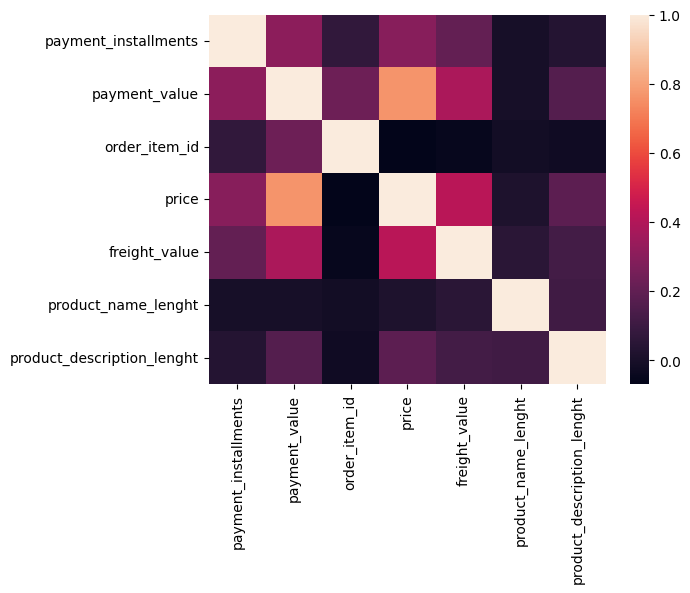

In [8]:
#heatmap of the correlation 
sns.heatmap(cs_df.corr())

Now we check for duplicates and we get rid of them 

In [9]:
#Check for duplicates
print('Data duplicates: ',cs_df.duplicated().sum())

#Get rid of the duplicates
cs_df=cs_df.drop_duplicates()

Data duplicates:  83


In [10]:
#Check for duplicates again
print('Data duplicates: ',cs_df.duplicated().sum()) #we now know that cs_df is our dataframe but w/o duplicates

Data duplicates:  0


Converting the list of date variables to a pandas datetime object

In [11]:
#Now we need to Change the data type in the date columns so that it matches the data type
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
             'order_estimated_delivery_date', 'shipping_limit_date'] 

for col in date_columns:
    cs_df[col] = pd.to_datetime(cs_df[col], format='%Y-%m-%d %H:%M:%S')

In [12]:
#create a column month_order for data exploration
cs_df['Month_order'] = cs_df['order_purchase_timestamp'].dt.to_period('M').astype('str')
print(cs_df['Month_order'])

0        2018-07
1        2018-08
2        2018-07
3        2018-08
4        2018-08
          ...   
13796    2018-07
13797    2018-05
13798    2018-04
13799    2018-07
13800    2018-08
Name: Month_order, Length: 13718, dtype: object


In [13]:
#Splitting data based on its datatype
only_numeric = cs_df.select_dtypes(include=['int', 'float'])
only_object = cs_df.select_dtypes(include=['object'])
only_time = cs_df.select_dtypes(include=['datetime', 'timedelta'])

Now we Encode the variables with OneHotEncoding.
We want to see which columns contain categorical values, so that we will be able to use OneHotEncoder/get_dummies on those columns.

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(sparse= False), ['order_status','payment_type', 'customer_city', 'customer_state', 'seller_city','seller_state', 'product_category_name_english']),
    remainder='passthrough')

encoded_df = transformer.fit_transform(cs_df)
encoded_df = pd.DataFrame(
    encoded_df, 
    columns=transformer.get_feature_names_out()  #getting the feature_names to get it better
)

encoded_df.head()

onehotencoder__order_status_canceled onehotencoder__order_status_delivered  \
0                                  0.0                                   1.0   
1                                  0.0                                   1.0   
2                                  0.0                                   1.0   
3                                  0.0                                   1.0   
4                                  0.0                                   1.0   

  onehotencoder__order_status_invoiced onehotencoder__order_status_processing  \
0                                  0.0                                    0.0   
1                                  0.0                                    0.0   
2                                  0.0                                    0.0   
3                                  0.0                                    0.0   
4                                  0.0                                    0.0   

  onehotencoder__order_status_shipped onehotencoder__payment_type_boleto  \
0                                 0.0                                1.0   
1                                 0.0                                0.0   
2                                 0.0                                1.0   
3                                 0.0                                0.0   
4                                 0.0                                0.0   

  onehotencoder__payment_type_credit_card  \
0                                     0.0   
1                                     1.0   
2                                     0.0   
3                                     1.0   
4                                     1.0   

  onehotencoder__payment_type_debit_card onehotencoder__payment_type_voucher  \
0                                    0.0                                 0.0   
1                                    0.0                                 0.0   
2                                    0.0                                 0.0   
3                                    0.0                                 0.0   
4                                    0.0                                 0.0   

  onehotencoder__customer_city_abaete  ... remainder__order_item_id  \
0                                 0.0  ...                        1   
1                                 0.0  ...                        1   
2                                 0.0  ...                        1   
3                                 0.0  ...                        1   
4                                 0.0  ...                        2   

              remainder__product_id              remainder__seller_id  \
0  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
1  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
3  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
4  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   

  remainder__shipping_limit_date remainder__price remainder__freight_value  \
0            2018-07-30 03:24:27            118.7                    22.76   
1            2018-08-13 14:31:29            116.9                    18.92   
2            2018-07-13 03:45:45            118.7                     9.34   
3            2018-08-23 10:50:54            116.9                    22.75   
4            2018-08-23 10:50:54            116.9                    22.75   

  remainder__product_category_name remainder__product_name_lenght  \
0                       perfumaria                             29   
1                       perfumaria                             29   
2                       perfumaria                             29   
3                       perfumaria                             29   
4                       perfumaria                             29   

  remainder__product_description_lenght remainder__Month_order  
0         

In [15]:
dummies_df = pd.get_dummies(cs_df, columns = ['order_status','payment_type', 'customer_city', 'customer_state', 'seller_city','seller_state', 'product_category_name_english'])

dummies_df.head()

order_id                       customer_id  \
0  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
1  86674ccaee19790309333210917b2c7d  1b338293f35549b5e480b9a3d7bbf3cd   
2  aee682982e18eb4714ce9f97b15af5e2  8858442ea4d5dc5bb9e118e8f728095d   
3  d543201a9b42a1402ff97e65b439a48b  971bf8f42a9f8cb3ead257854905b454   
4  d543201a9b42a1402ff97e65b439a48b  971bf8f42a9f8cb3ead257854905b454   

  order_purchase_timestamp   order_approved_at order_delivered_carrier_date  \
0      2018-07-24 20:41:37 2018-07-26 03:24:27          2018-07-26 14:31:00   
1      2018-08-09 11:37:35 2018-08-09 14:35:19          2018-08-10 14:34:00   
2      2018-07-09 18:46:28 2018-07-11 03:45:45          2018-07-11 15:01:00   
3      2018-08-21 10:00:25 2018-08-21 10:50:54          2018-08-22 15:21:00   
4      2018-08-21 10:00:25 2018-08-21 10:50:54          2018-08-22 15:21:00   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2018-08-07 15:27:45                    2018-08-13   
1           2018-08-14 18:51:47                    2018-08-22   
2           2018-07-12 18:14:35                    2018-07-18   
3           2018-08-28 18:58:22                    2018-09-10   
4           2018-08-28 18:58:22                    2018-09-10   

   payment_installments  payment_value                customer_unique_id  ...  \
0                     1         141.46  af07308b275d755c9edb36a90c618231  ...   
1                     5         135.82  8b8028d453a01986b48c4271cc341475  ...   
2                     1         128.04  3edcab192482e9871c17b34cf98c3996  ...   
3                     2         279.30  958ac7760e5484df1496ba5833ab6117  ...   
4                     2         279.30  958ac7760e5484df1496ba5833ab6117  ...   

   product_category_name_english_pet_shop  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

  product_category_name_english_signaling_and_security  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

  product_category_name_english_small_appliances  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

  product_category_name_english_small_appliances_home_oven_and_coffee  \
0                                                  0                    
1                                                  0                    
2                                                  0                    
3                                                  0                    
4                                                  0                    

   product_category_name_english_sports_leisure  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   product_category_name_english_stationery  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

  product_category_name_english_tablets_printing_image  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                        




### Data Exploration (we get insight that could be useful to the company)

We started slow by simply plotting a few variables we could find many times in every column by looking at the csv manually i.e the state of the order and the payment type and customer/seller state

delivered     13414
shipped         153
canceled         86
invoiced         54
processing       11
Name: order_status, dtype: int64

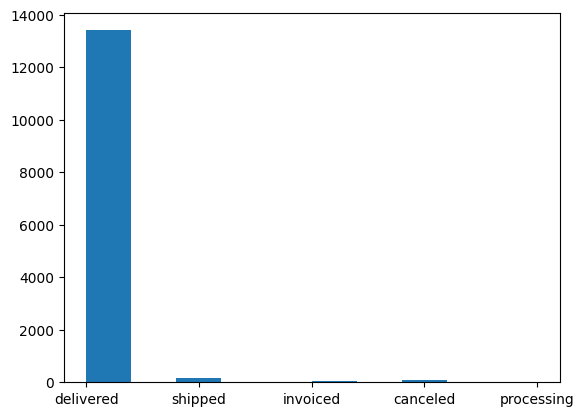

credit_card    10320
boleto          2515
voucher          515
debit_card       368
Name: payment_type, dtype: int64

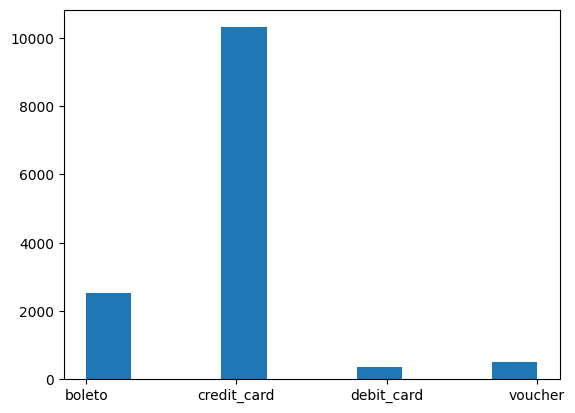

In [16]:
#We display a few of the variables with an outcome that is not confusing
display(pd.value_counts(cs_df['order_status']))
_ = plt.hist(cs_df['order_status']) 
plt.show()

display(pd.value_counts(cs_df['payment_type']))
_ = plt.hist(cs_df['payment_type']) 
plt.show()

[Text(0, 0, 'BA'),
 Text(1, 0, 'SP'),
 Text(2, 0, 'MG'),
 Text(3, 0, 'SC'),
 Text(4, 0, 'PR'),
 Text(5, 0, 'RJ'),
 Text(6, 0, 'RS'),
 Text(7, 0, 'RN'),
 Text(8, 0, 'GO'),
 Text(9, 0, 'MT'),
 Text(10, 0, 'MS'),
 Text(11, 0, 'PE'),
 Text(12, 0, 'CE'),
 Text(13, 0, 'PA'),
 Text(14, 0, 'ES'),
 Text(15, 0, 'DF'),
 Text(16, 0, 'RR'),
 Text(17, 0, 'RO'),
 Text(18, 0, 'MA'),
 Text(19, 0, 'AL'),
 Text(20, 0, 'TO'),
 Text(21, 0, 'PI'),
 Text(22, 0, 'PB'),
 Text(23, 0, 'AM'),
 Text(24, 0, 'AP'),
 Text(25, 0, 'SE'),
 Text(26, 0, 'AC')]

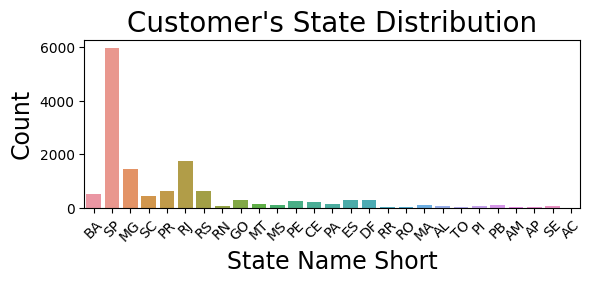

In [17]:
plt.subplot(212)
g = sns.countplot(x='customer_state', data=cs_df, orient='h')
g.set_title("Customer's State Distribution", fontsize=20)
g.set_xlabel("State Name Short", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

[Text(0, 0, 'SP'),
 Text(1, 0, 'RJ'),
 Text(2, 0, 'DF'),
 Text(3, 0, 'MG'),
 Text(4, 0, 'PR'),
 Text(5, 0, 'SC'),
 Text(6, 0, 'RS'),
 Text(7, 0, 'MT'),
 Text(8, 0, 'GO'),
 Text(9, 0, 'MA'),
 Text(10, 0, 'CE'),
 Text(11, 0, 'PB'),
 Text(12, 0, 'PE'),
 Text(13, 0, 'BA'),
 Text(14, 0, 'ES'),
 Text(15, 0, 'PI'),
 Text(16, 0, 'MS'),
 Text(17, 0, 'RN')]

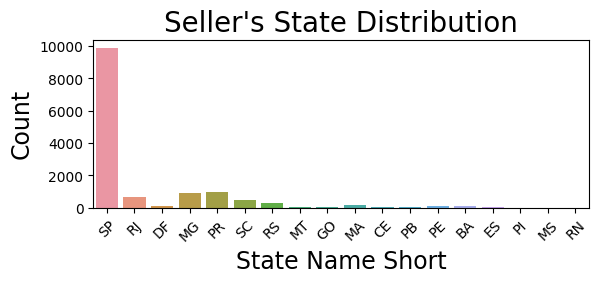

In [18]:
plt.subplot(212)
g = sns.countplot(x='seller_state', data=cs_df, orient='h')
g.set_title("Seller's State Distribution", fontsize=20)
g.set_xlabel("State Name Short", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

As we can see the most orders are placed in SP, which is Sao Paulo

With this other graph we could find that most of the time items are being ordered only once. This is typical in E-commerce because customers are usually one-time buyers, and end up almost never returning to buy again.

In [19]:
cs_df['ord_new'] = cs_df['order_item_id'].copy()

cs_df.loc[cs_df['order_item_id'].isin([7,8,9,10]), 'ord_new'] = '7 to 10'
cs_df.loc[(cs_df['order_item_id'] > 10), 'ord_new'] = '10 to 20'

Text(0, 0.5, 'Count')

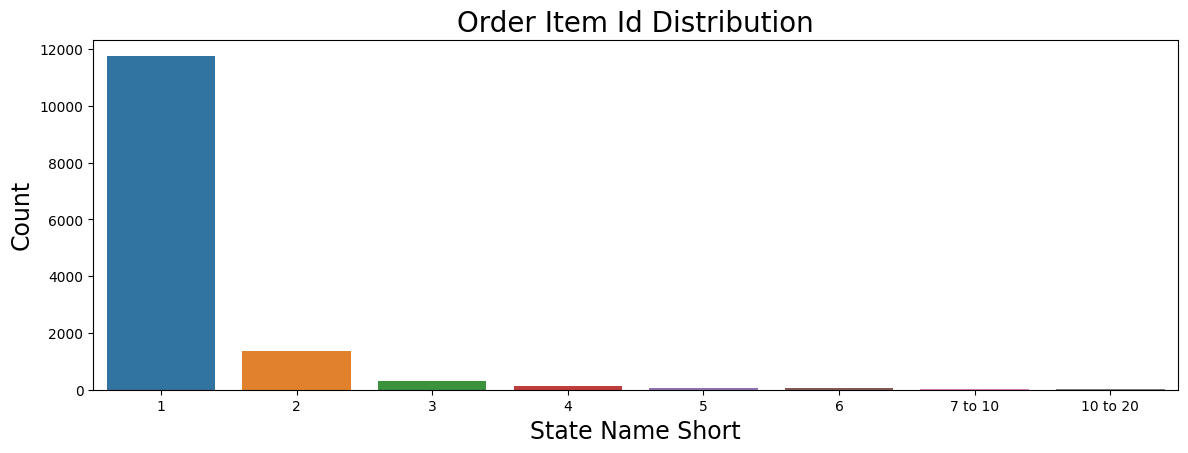

In [20]:
plt.figure(figsize=(14,10))


plt.subplot(211)
g = sns.countplot(x='ord_new', data=cs_df)
g.set_title("Order Item Id Distribution", fontsize=20)
g.set_xlabel("State Name Short", fontsize=17)
g.set_ylabel("Count", fontsize=17)

As you can see most customers only ordered one item (this is typical in E-commerce)

Text(0, 0.5, 'Product category')

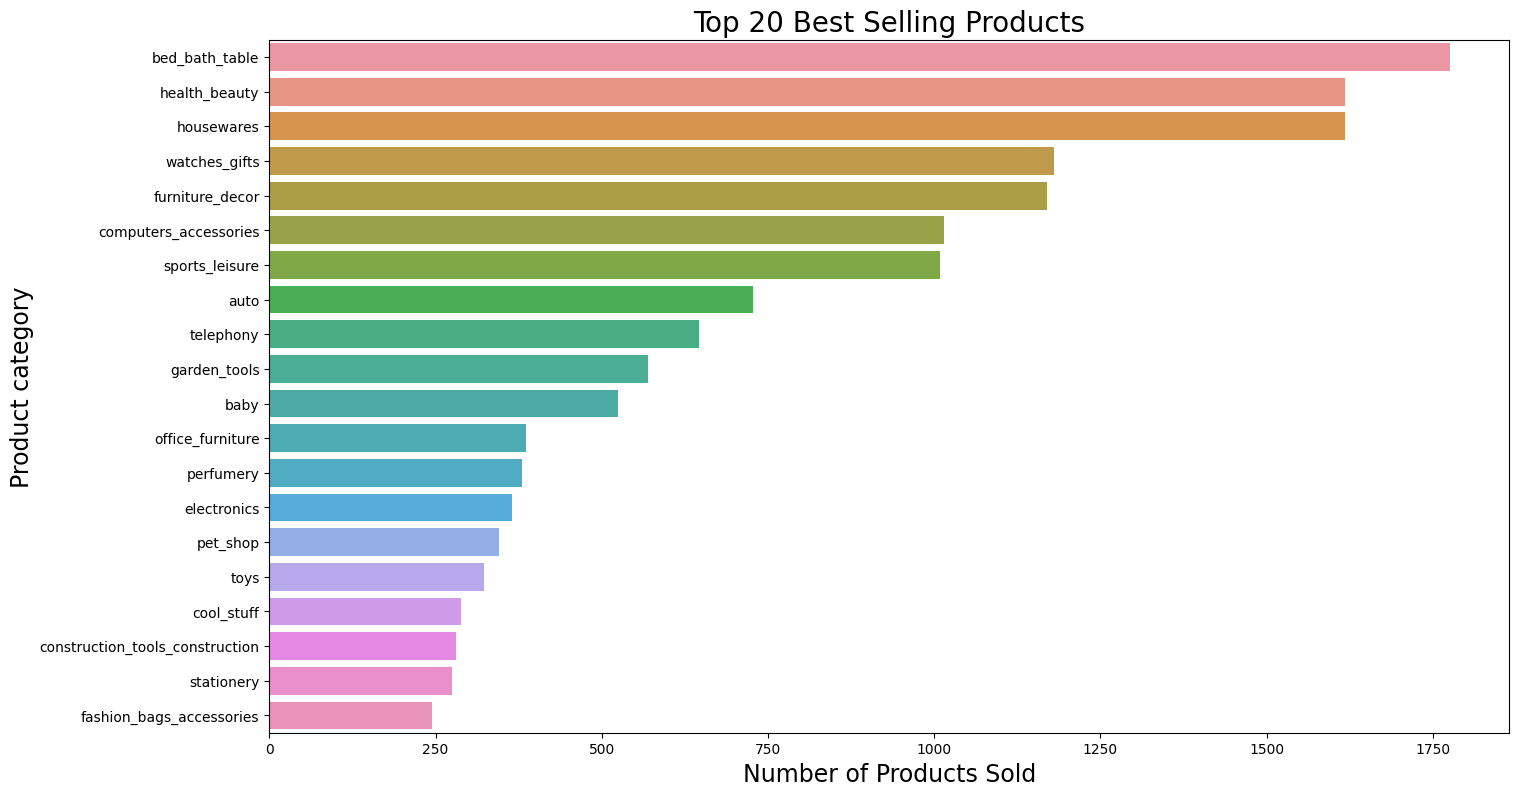

In [21]:
top_20_product_best_seller = cs_df['order_item_id'].groupby(cs_df['product_category_name_english']).sum().sort_values(ascending=False)[:20]
#print(top_20_product_best_seller)


fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_20_product_best_seller.index,x=top_20_product_best_seller.values)
plt.title('Top 20 Best Selling Products',fontsize=20)
plt.xlabel('Number of Products Sold',fontsize=17)
plt.ylabel('Product category',fontsize=17)

Text(0, 0.5, 'City')

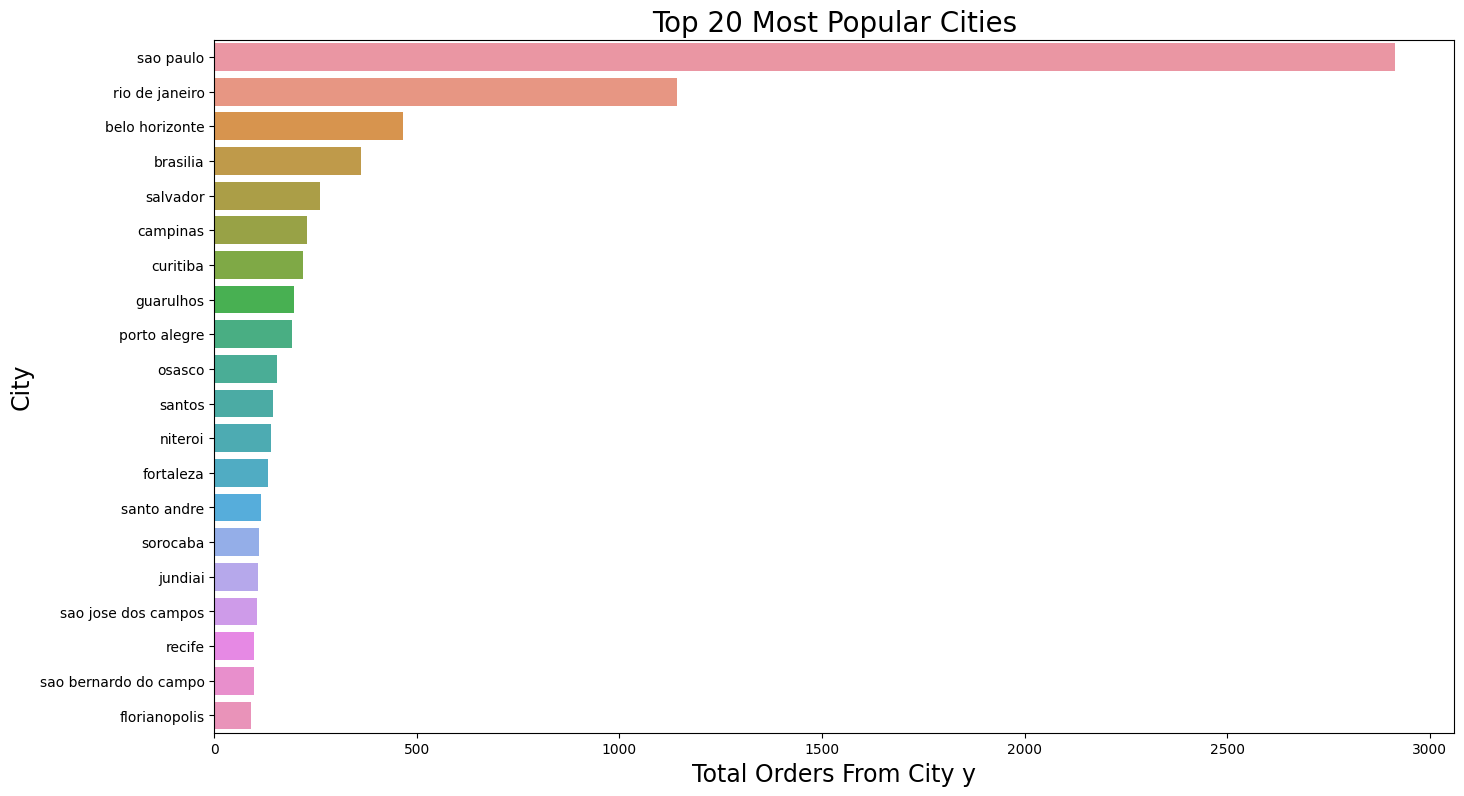

In [22]:
top_20_most_shopped_cities = cs_df['order_item_id'].groupby(cs_df['customer_city']).sum().sort_values(ascending=False)[:20]



fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_20_most_shopped_cities.index,x=top_20_most_shopped_cities.values)
plt.title('Top 20 Most Popular Cities',fontsize=20)
plt.xlabel('Total Orders From City y',fontsize=17)
plt.ylabel('City',fontsize=17)

Text(0, 0.5, 'Customer ID')

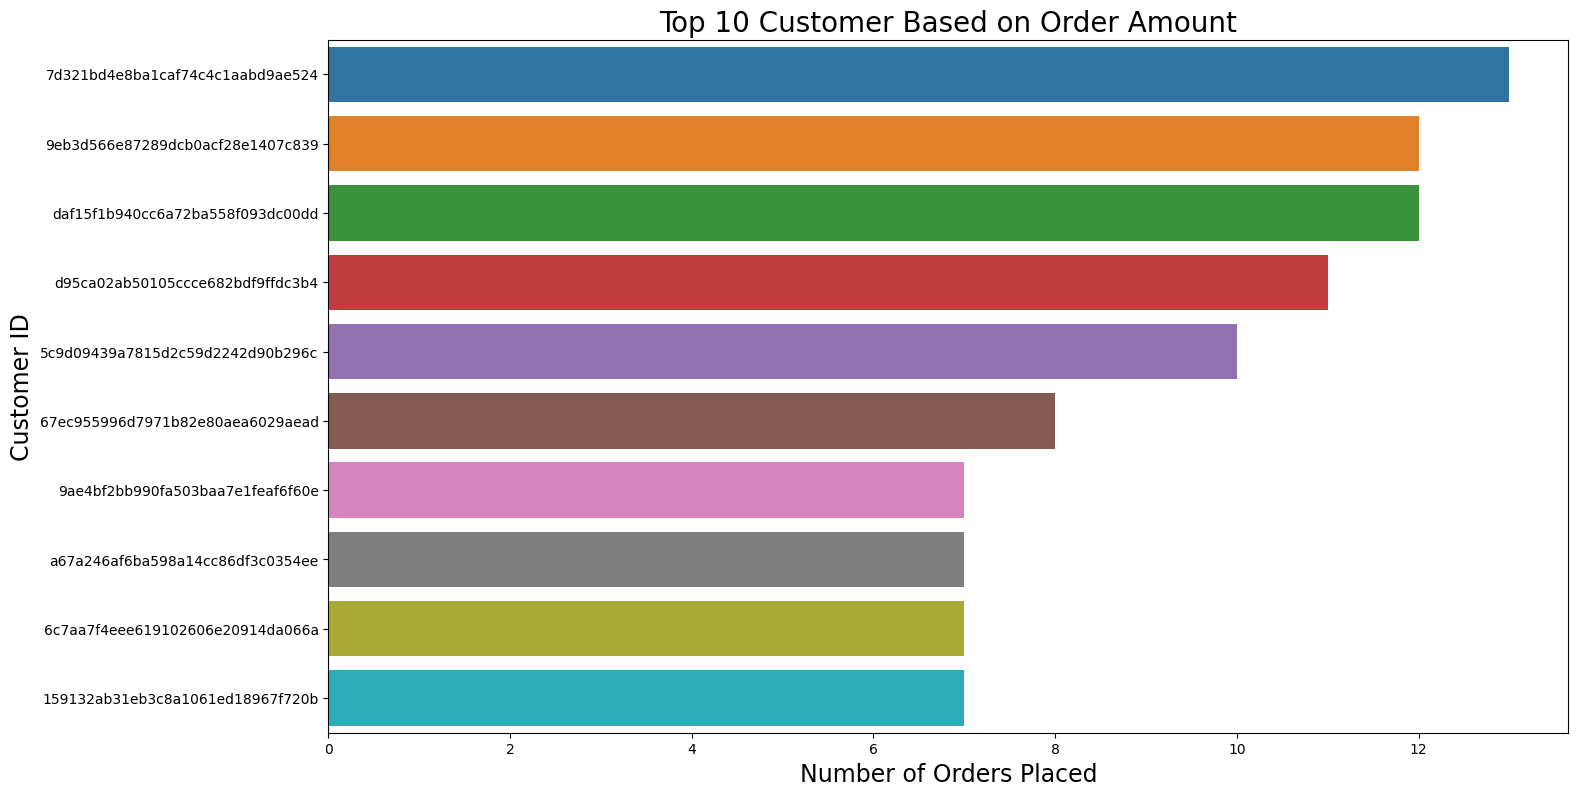

In [23]:
#the 10 customers who ordered the most
top_10_buyers = cs_df['order_item_id'].groupby(cs_df['customer_id']).count().sort_values(ascending=False)[:10]



fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_buyers.index,x=top_10_buyers.values)
plt.title('Top 10 Customer Based on Order Amount',fontsize=20)
plt.xlabel('Number of Orders Placed',fontsize=17)
plt.ylabel('Customer ID',fontsize=17)

Text(0, 0.5, 'Customer ID')

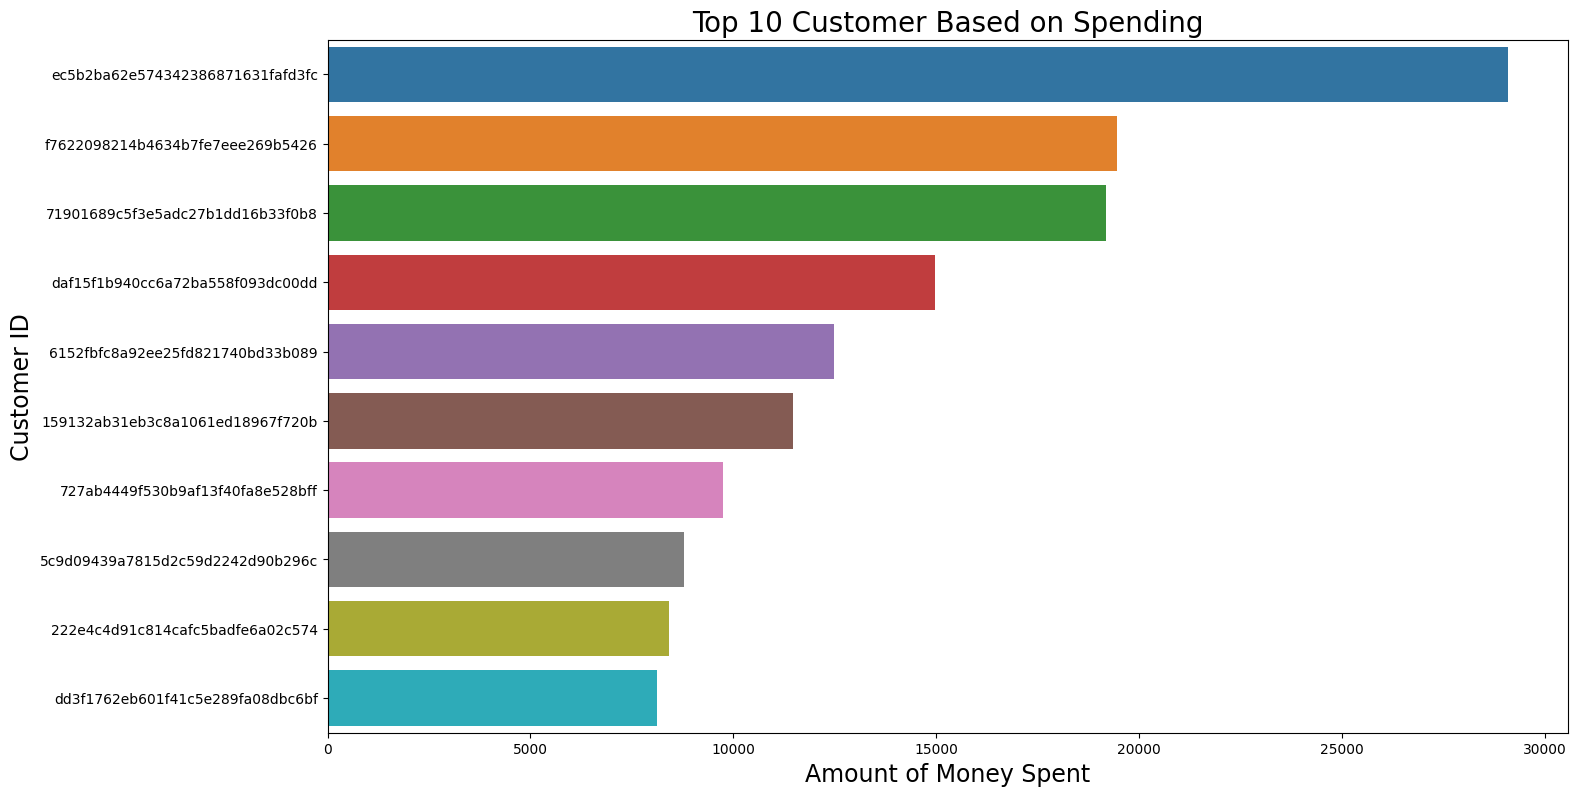

In [24]:
#the 10 most spending customers
top_10_spenders = cs_df['payment_value'].groupby(cs_df['customer_id']).sum().sort_values(ascending=False)[:10]


fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_spenders.index,x=top_10_spenders.values)
plt.title('Top 10 Customer Based on Spending',fontsize=20)
plt.xlabel('Amount of Money Spent',fontsize=17)
plt.ylabel('Customer ID',fontsize=17)

In [25]:
#Distribution of customer order status
round(cs_df.order_status.value_counts() / len(cs_df),2)

delivered     0.98
shipped       0.01
canceled      0.01
invoiced      0.00
processing    0.00
Name: order_status, dtype: float64

In [26]:
cs_df['order_process_time'] = cs_df['order_delivered_customer_date'] - cs_df['order_purchase_timestamp']

Text(0, 0.5, 'Product Category')

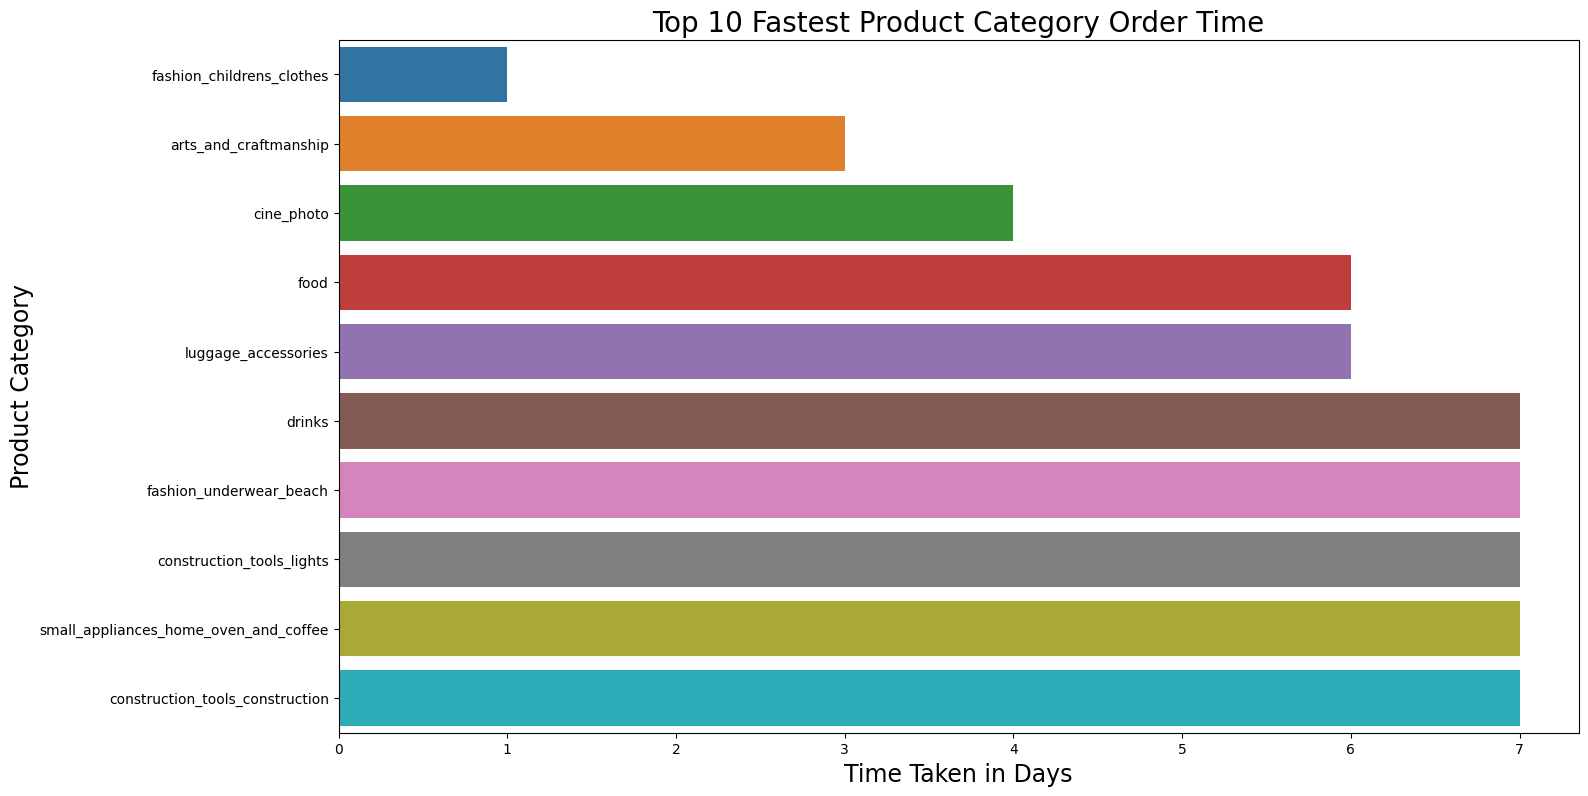

In [27]:
#10 product categories with the fastest time from order to customer acceptance
order_time_by_category = pd.DataFrame(cs_df['order_process_time'].groupby(cs_df['product_category_name_english']).median(numeric_only=False).sort_values(ascending=True)[:10])


fig=plt.figure(figsize=(16,9))
sns.barplot(y=order_time_by_category.index, x=order_time_by_category['order_process_time'].dt.days)
plt.title('Top 10 Fastest Product Category Order Time',fontsize=20)
plt.xlabel('Time Taken in Days',fontsize=17)
plt.ylabel('Product Category',fontsize=17)

Text(0, 0.5, 'Product Category')

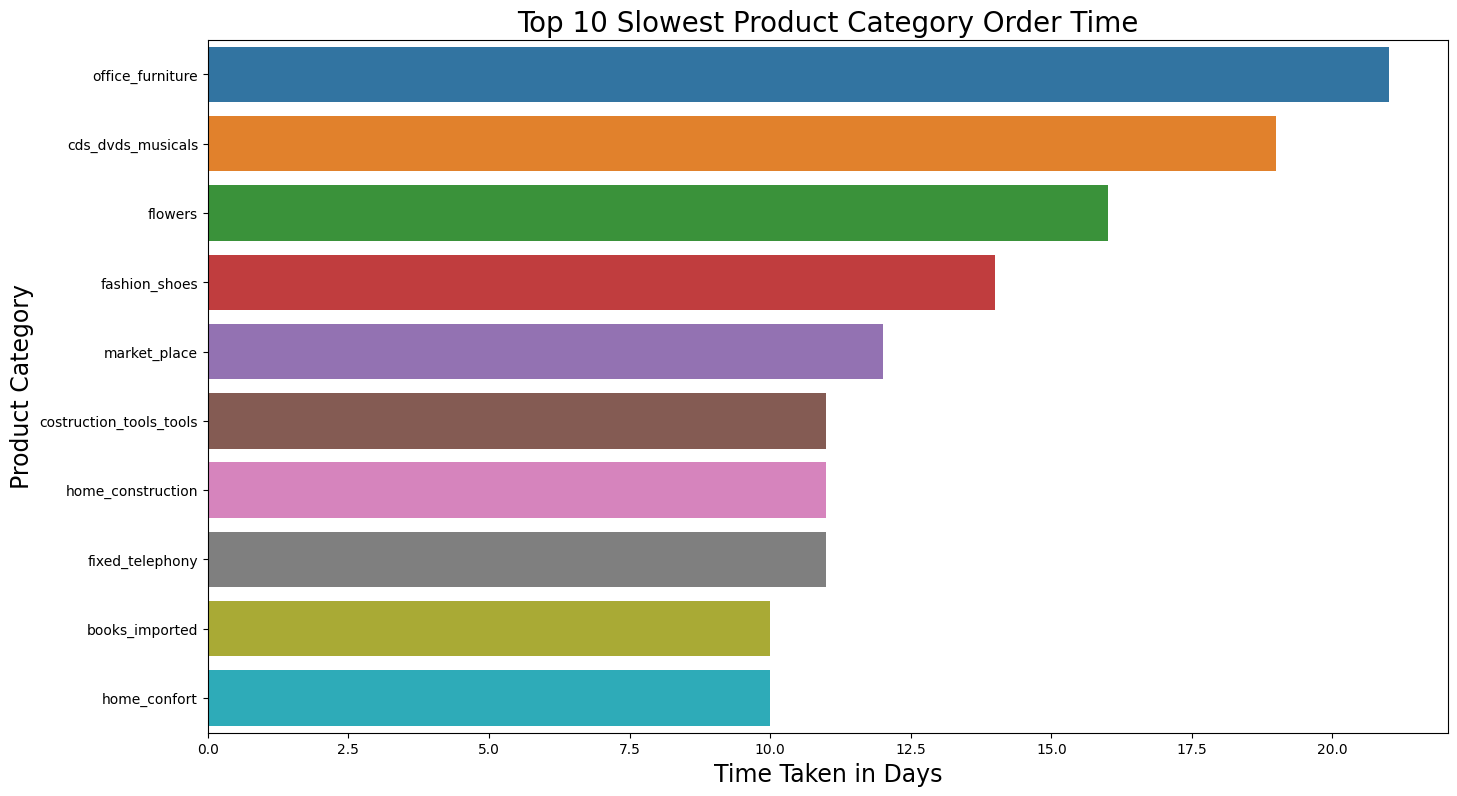

In [28]:
#10 product categories with the longest time from order to customer acceptance
order_time_by_category = pd.DataFrame(cs_df['order_process_time'].groupby(cs_df['product_category_name_english']).median(numeric_only=False).sort_values(ascending=False)[:10])


fig=plt.figure(figsize=(16,9))
sns.barplot(y=order_time_by_category.index, x=order_time_by_category['order_process_time'].dt.days)
plt.title('Top 10 Slowest Product Category Order Time',fontsize=20)
plt.xlabel('Time Taken in Days',fontsize=17)
plt.ylabel('Product Category',fontsize=17)

Confronting those two graphs we instantly knew they made sense, because fast shipping products are usually smaller and lighter (like baby clothes) while something like office furniture takes much more time.

Text(0, 0.5, 'Orders Placed')

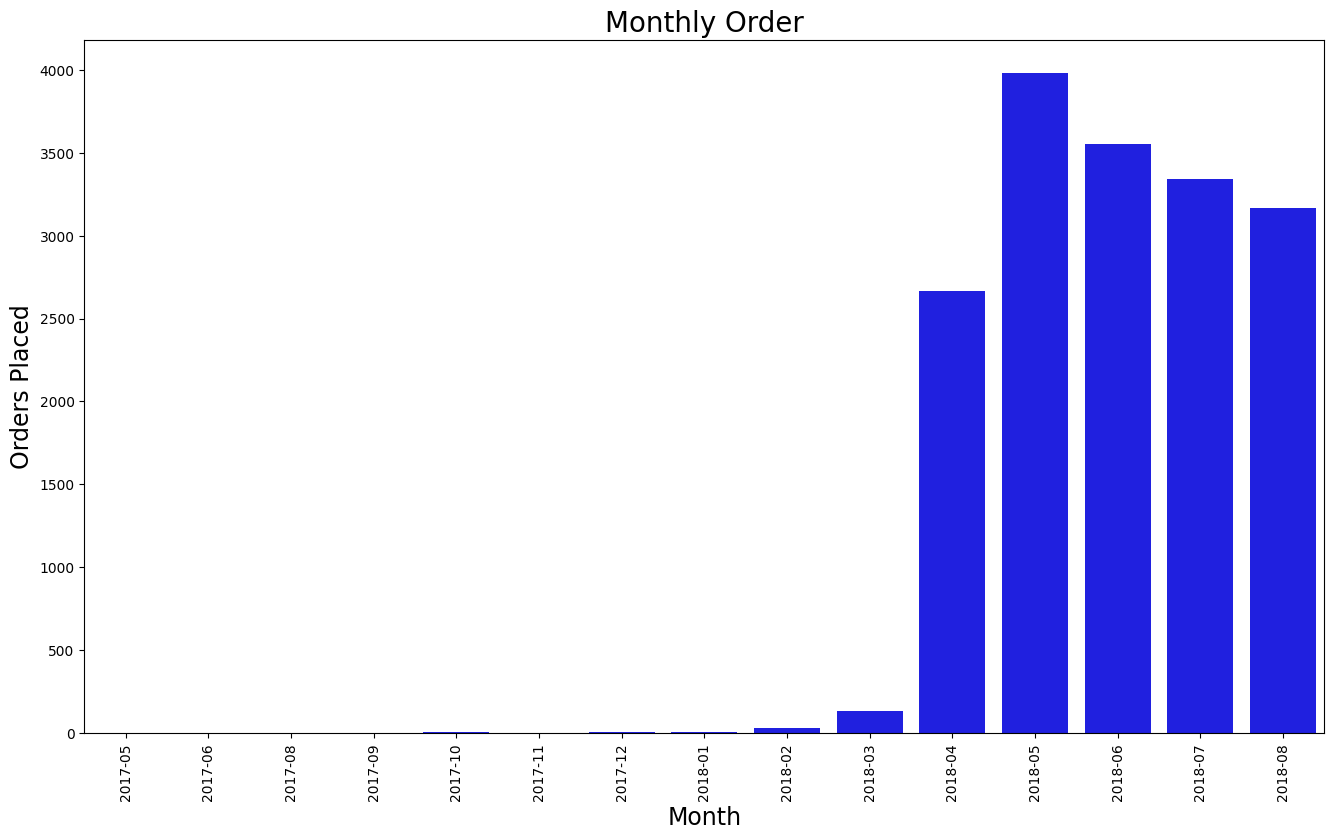

In [29]:
order_count_by_month = cs_df['order_item_id'].groupby(cs_df['Month_order']).sum()


fig=plt.figure(figsize=(16,9))
sns.barplot(y=order_count_by_month.values, x=order_count_by_month.index, color="Blue")
plt.title('Monthly Order',fontsize=20)
plt.xlabel('Month',fontsize=17)
plt.xticks(rotation=90)
plt.ylabel('Orders Placed',fontsize=17)

Text(0, 0.5, 'Monthly Revenue')

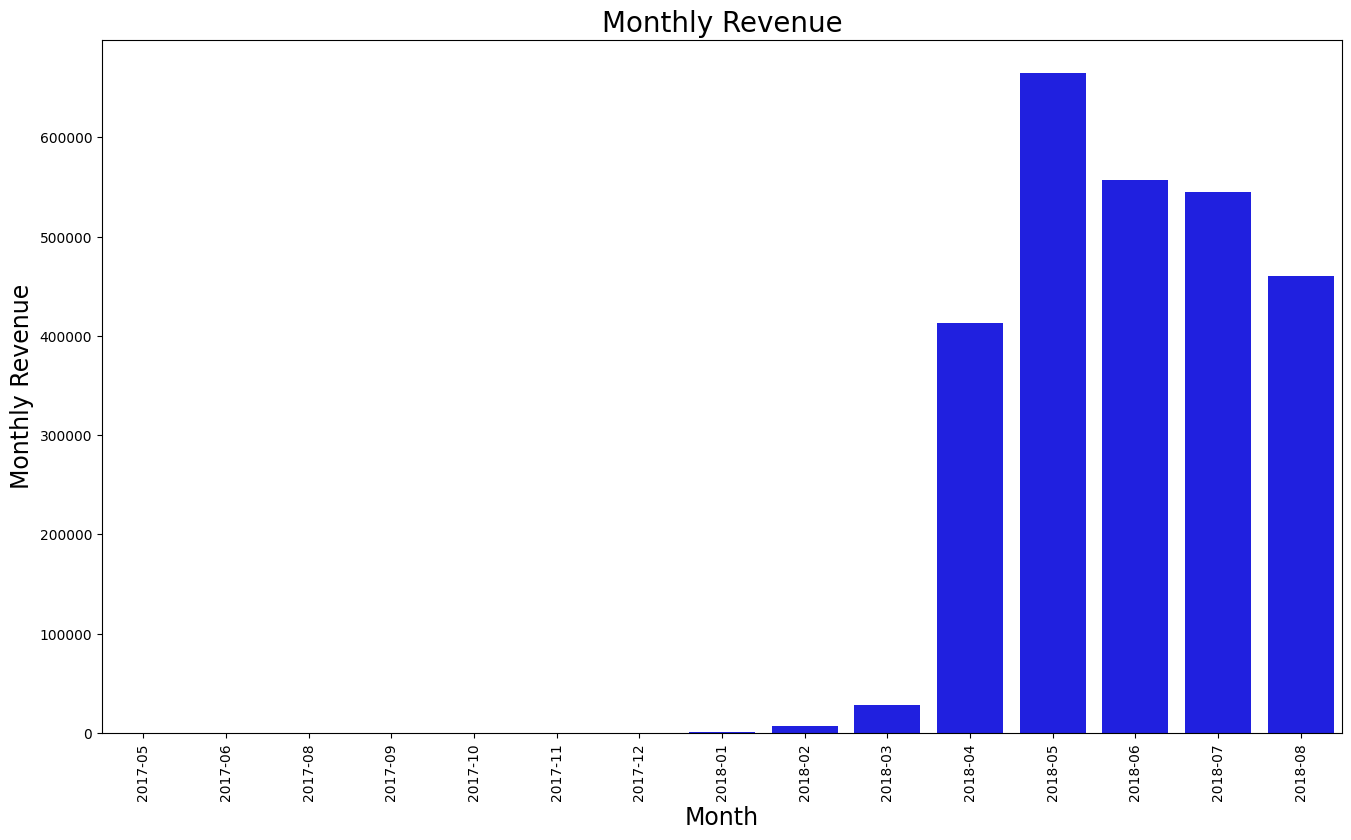

In [30]:
revenue_count_by_month = cs_df['payment_value'].groupby(cs_df['Month_order']).sum()


fig=plt.figure(figsize=(16,9))
sns.barplot(y=revenue_count_by_month.values, x=revenue_count_by_month.index, color="Blue")
plt.title('Monthly Revenue',fontsize=20)
plt.xlabel('Month',fontsize=17)
plt.xticks(rotation=90)
plt.ylabel('Monthly Revenue',fontsize=17)

Text(0, 0.5, 'Number of Users')

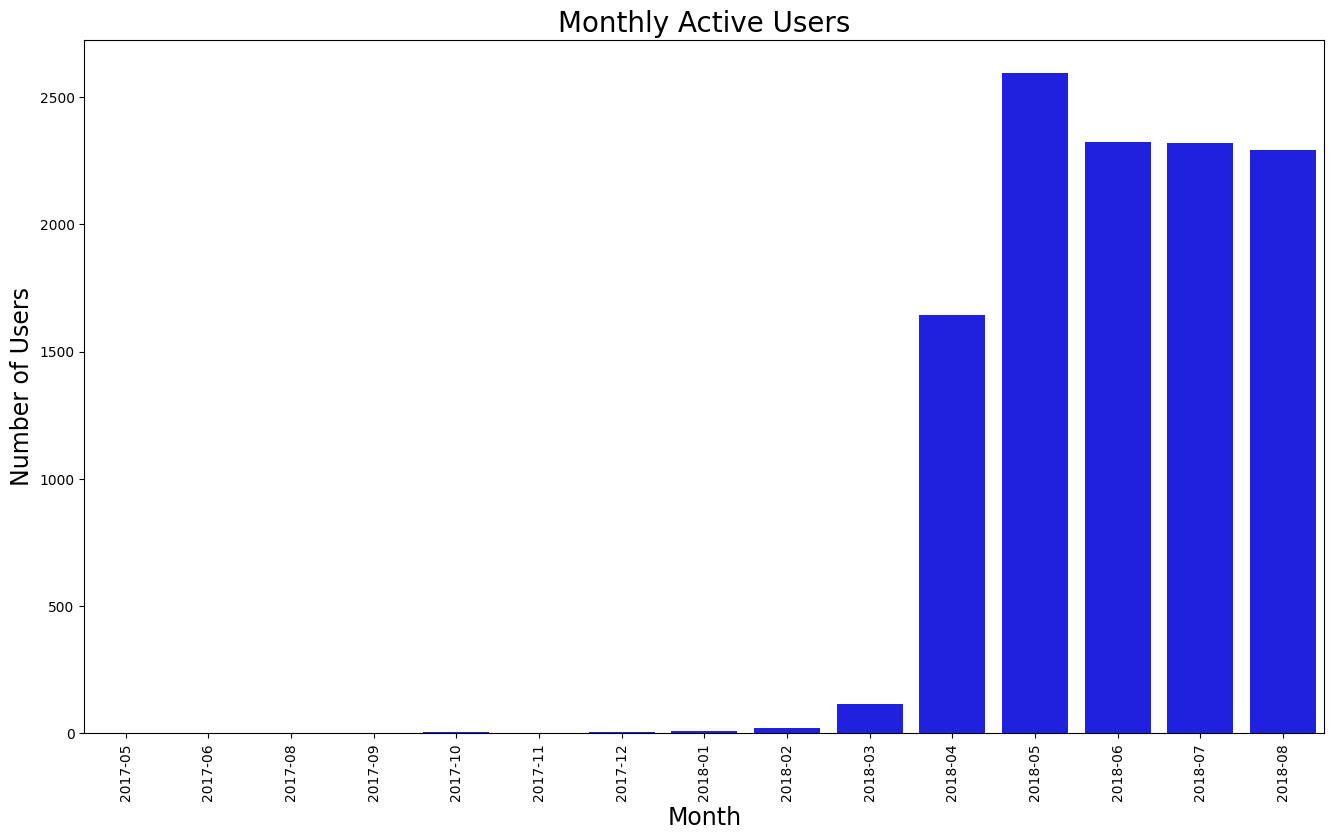

In [31]:
customer_active_by_month = cs_df.groupby('Month_order')['customer_unique_id'].nunique().reset_index()


fig=plt.figure(figsize=(16,9))
sns.barplot(y=customer_active_by_month['customer_unique_id'], x=customer_active_by_month['Month_order'], color="Blue")
plt.title('Monthly Active Users',fontsize=20)
plt.xlabel('Month',fontsize=17)
plt.xticks(rotation=90)
plt.ylabel('Number of Users',fontsize=17)

Here we find simple information about the monthly activity of the subsidiary and we can clearly see how the month where the most orders were placed is also the one with the highest revenue and highest number of active users

### Building Our Model

At this stage, modelling will be carried out using a  few clustering algorithms, namely K-Means, hierarchical, GMM and Spectral, based on RFM (Recency, Frequency, and Monetary) analysis for customer segmentation.

### RFM Analysis

● Recency value: refers to the time since a customer’s last purchase.

● Frequency value: refers to the number of times a customer has made a purchase.

● Monetary value: refers to the total amount a customer has spent purchasing products


In [32]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
import squarify

Here we divide date and time because we only need the date of an order to find the recency

In [33]:
cs_df['order_purchase_timestamp'] = pd.to_datetime(cs_df['order_purchase_timestamp'])

cs_df['order_date'] = [d.date() for d in cs_df['order_purchase_timestamp']]
cs_df['order_time'] = [d.time() for d in cs_df['order_purchase_timestamp']]

We then calculate the recency, frequency and monetary value for each customer_id (using order_date and payment_value)

In [34]:
#rfm analysis

#Calculating the RECENCY : time since a customer's last purchase 
df_recency = cs_df.groupby(by='customer_unique_id', as_index=False)['order_date'].max() #here we assign the max of order_date to the column: LastPurchaseDate
df_recency.columns = ['CustomerId', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply( lambda x: (recent_date - x).days)
df_recency.head()

CustomerId LastPurchaseDate  Recency
0  0000366f3b9a7992bf8c76cfdf3221e2       2018-05-10      111
1  000ec5bff359e1c0ad76a81a45cb598f       2018-08-21        8
2  00172711b30d52eea8b313a7f2cced02       2018-07-28       32
3  001928b561575b2821c92254a2327d06       2018-08-24        5
4  0019e8c501c85848ac0966d45226fa1d       2018-05-01      120

In [35]:
#calculating the FREQUENCY: how many times has a customer made a purchase 
frequency_df = cs_df.drop_duplicates().groupby(by=['customer_unique_id'], as_index=False)['order_date'].count()
frequency_df.columns = ['CustomerId', 'Frequency']
frequency_df

CustomerId  Frequency
0      0000366f3b9a7992bf8c76cfdf3221e2          1
1      000ec5bff359e1c0ad76a81a45cb598f          1
2      00172711b30d52eea8b313a7f2cced02          1
3      001928b561575b2821c92254a2327d06          2
4      0019e8c501c85848ac0966d45226fa1d          1
...                                 ...        ...
11242  ffecceca389973ef16660d58696f281e          1
11243  ffee94d548cef05b146d825a7648dab4          1
11244  fff2ae16b99c6f3c785f0e052f2a9cfb          1
11245  fff3e1d7bc75f11dc7670619b2e61840          1
11246  ffff5962728ec6157033ef9805bacc48          1

[11247 rows x 2 columns]

In [36]:
#calculating the MONETARY VALUE: total amount a customer has spend purchasing product
monetary_df = cs_df.groupby(by='customer_unique_id', as_index=False)['payment_value'].sum()
monetary_df.columns = ['CustomerId', 'Monetary']
monetary_df.head()

CustomerId  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2    141.90
1  000ec5bff359e1c0ad76a81a45cb598f     27.75
2  00172711b30d52eea8b313a7f2cced02    122.07
3  001928b561575b2821c92254a2327d06    329.62
4  0019e8c501c85848ac0966d45226fa1d    197.27

In [37]:
rfm = pd.merge(df_recency, frequency_df, on='CustomerId', how='inner')
rfm = pd.merge(rfm, monetary_df, on='CustomerId', how='inner')
rfm.drop('LastPurchaseDate', inplace=True, axis=1)
rfm.drop('CustomerId', inplace=True, axis=1)

In [38]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [39]:
rfm.head()

Recency  Frequency  Monetary
0      111          1    141.90
1        8          1     27.75
2       32          1    122.07
3        5          2    329.62
4      120          1    197.27

In [40]:
colnames = ['Recency', 'Frequency', 'Monetary']

Here we plot the distributions of the densities

c:\Users\matte\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


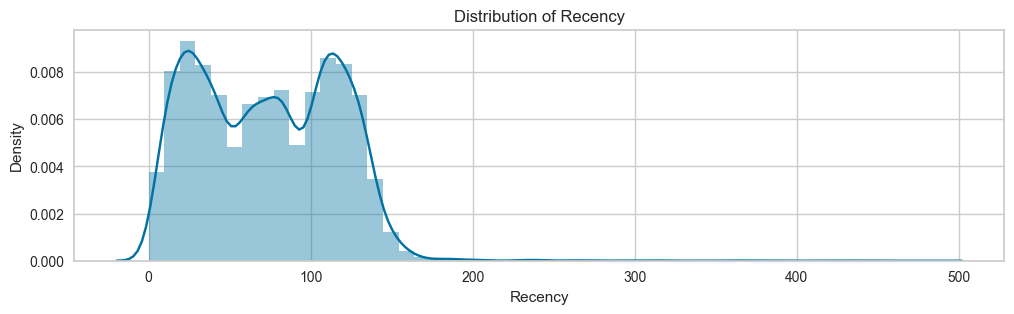

c:\Users\matte\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


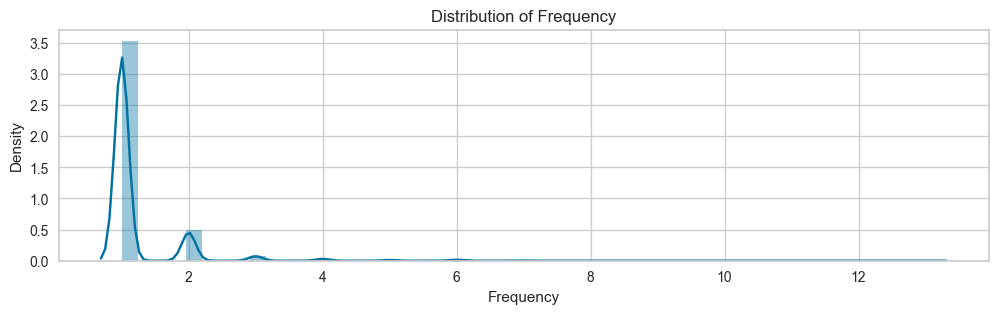

c:\Users\matte\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


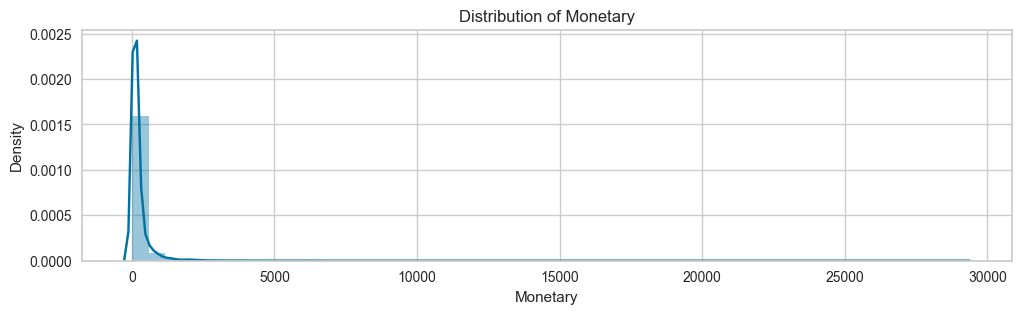

In [41]:
for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(rfm[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

In [42]:
rfm.corr()

Recency  Frequency  Monetary
Recency    1.000000   0.022625  0.028389
Frequency  0.022625   1.000000  0.499639
Monetary   0.028389   0.499639  1.000000

We can see there is a correlation between customers who spent more frequently and customers who spent the most, clearly because most of the time the more times you buy implies the more you spend.

<AxesSubplot: xlabel='Recency', ylabel='Monetary'>

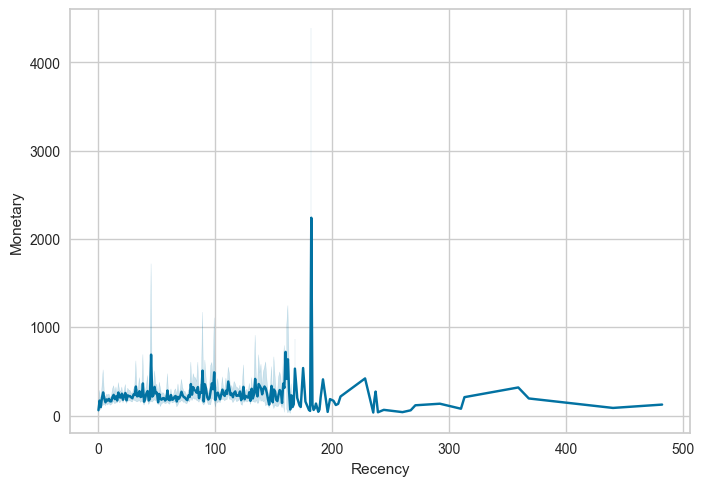

In [43]:
timeordered = rfm.sort_values(by = ["Recency"], ascending = False)
timeordered.head()
sns.lineplot(x = "Recency", y = "Monetary", data = timeordered)

This plot right here tells us that the company has an increasing number of customers as well as an increasing revenue. Because the money spent in recent days is higher and there are more frequent orders (for reference on can check the above graphs that give us pretty much the same informations)

In [44]:
rfm.describe()

Recency     Frequency      Monetary
count  11247.000000  11247.000000  11247.000000
mean      73.246199      1.219703    238.087796
std       42.652014      0.668391    605.264572
min        0.000000      1.000000     10.710000
25%       35.000000      1.000000     67.340000
50%       73.000000      1.000000    120.220000
75%      111.000000      1.000000    215.175000
max      482.000000     13.000000  29099.520000

On average, for people who buy more than once (very few), the next purchase happens 2.5 months after the last. Customers tent to spend around 250 dollars and only buy once. This data could be a little biased as we know there are a few outliers (just by looking at the maximum value for monetary and frequency we see someone who spent almost 30k, and someone who ordered 13 times)

In [45]:
rfm = rfm[['Recency', 'Frequency', 'Monetary']]
scaler= MinMaxScaler()
scaled_rfm= scaler.fit_transform(rfm)

In [46]:
rfm = rfm[['Recency', 'Frequency', 'Monetary']]
scaler= StandardScaler()
scaled_rfm_2= scaler.fit_transform(rfm)

In [47]:
rfm = rfm[['Recency', 'Frequency', 'Monetary']]
unscaled_rfm_array=rfm.to_numpy()

In [48]:
print(unscaled_rfm_array)

[[111.     1.   141.9 ]
 [  8.     1.    27.75]
 [ 32.     1.   122.07]
 ...
 [131.     1.   200.9 ]
 [ 40.     1.    82.51]
 [119.     1.   133.69]]


In [49]:
print(scaled_rfm)

[[0.23029046 0.         0.00450998]
 [0.01659751 0.         0.00058579]
 [0.06639004 0.         0.00382828]
 ...
 [0.27178423 0.         0.00653825]
 [0.08298755 0.         0.0024683 ]
 [0.24688797 0.         0.00422774]]


In [50]:
print(scaled_rfm_2)

[[ 0.88519804 -0.32871889 -0.15892566]
 [-1.52980114 -0.32871889 -0.34752926]
 [-0.96708288 -0.32871889 -0.19168965]
 ...
 [ 1.35412992 -0.32871889 -0.06144329]
 [-0.77951013 -0.32871889 -0.2570524 ]
 [ 1.0727708  -0.32871889 -0.17249058]]


We decided to make an array of the rfm, both scaled and unscaled, because we needed them to plot the 3D graphs.

### K-Means Clustering

K-means is a popular algorithm for clustering data because it is relatively simple to understand and implement, and it can be applied to a wide range of data sets. It works by dividing a set of data points into a specified number of clusters, or groups, such that the data points within each cluster are more similar to each other than they are to data points in other clusters.

To use the k-means algorithm, you need to specify the number of clusters you want to create, called "k". The algorithm will then assign each data point to one of the k clusters, based on the similarity of the data points to the centroid (mean) of the cluster. The algorithm will iterate through the data set multiple times, reassigning data points to clusters and updating the centroids of the clusters until the assignment of data points to clusters is stable and no longer changes.

One advantage of k-means is that it is computationally efficient and scales well to large data sets. It is also relatively easy to interpret the results, as each data point is assigned to a specific cluster. However, one disadvantage is that the algorithm relies on the assumption that the clusters are spherical and equally sized, which may not always be the case in real-world data. Additionally, the choice of k can be subjective and may require some trial and error to find the best value

To optimize the k-means and choose a good 'k', we used the elbow method.

In [51]:
wcss=[]

for k in range (1,10):
    kmeans = KMeans (n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(rfm)
    wcss.append(kmeans.inertia_)

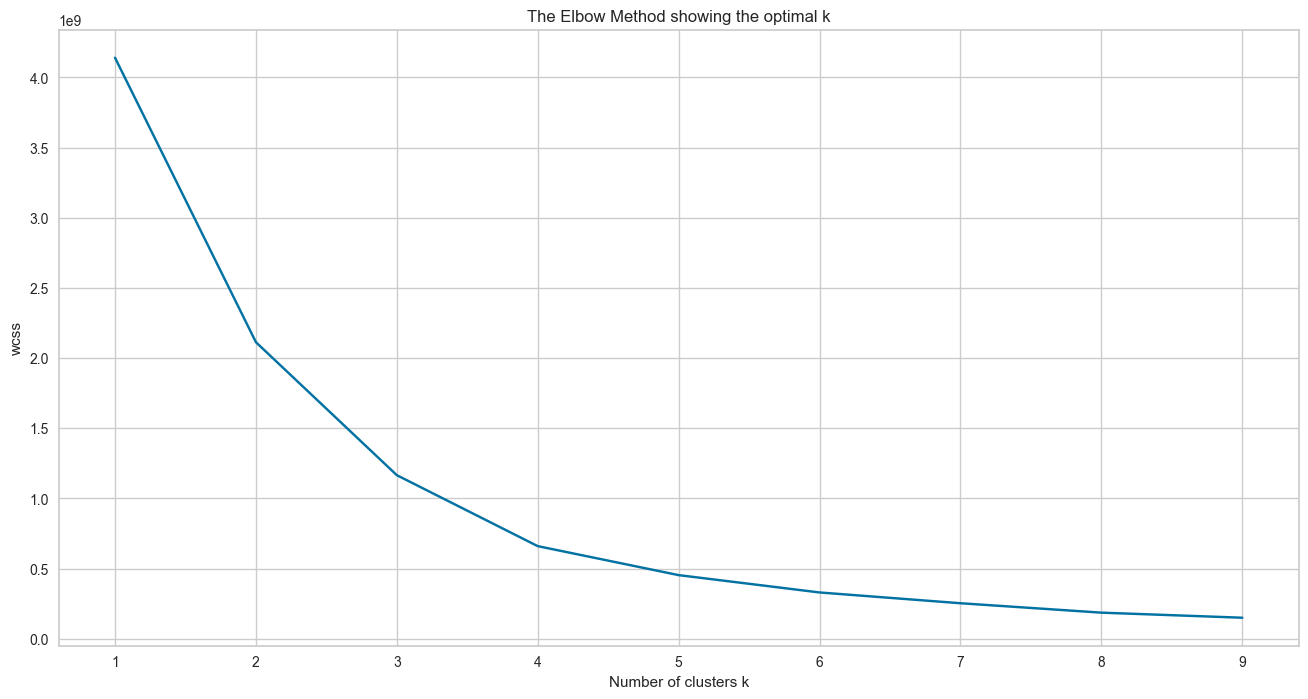

In [52]:
plt.figure(figsize=(16,8))
plt.plot(range(1,10), wcss, 'bx-')
plt.xlabel('Number of clusters k')
plt.ylabel('wcss')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Since you can't really tell here, we plotted the elbow method using yellowbrick, which is really precise.

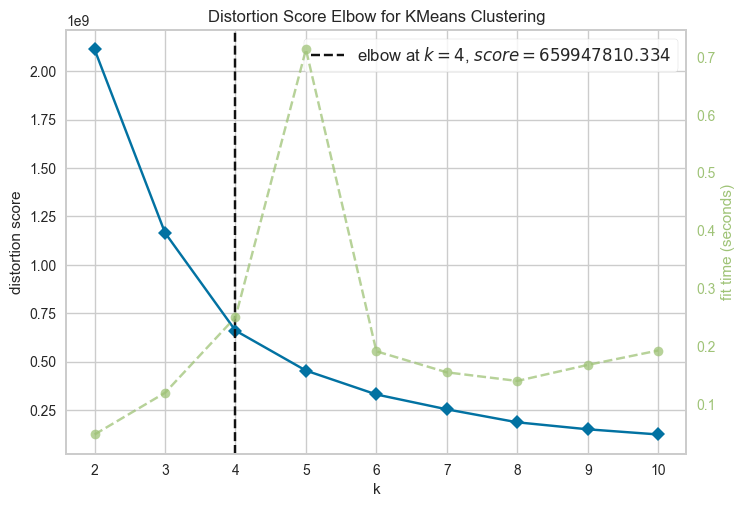

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
visualizer =KElbowVisualizer(kmeans, kmeans=(2,8))
visualizer.fit(rfm)
visualizer.show()

In [54]:
#fitting the k-means with 4 clusters

kmeans = KMeans(n_clusters = 4, init= 'k-means++', max_iter= 300 )
# Use fit_predict to cluster the dataset
kmeans_clusters = kmeans.fit_predict(rfm)

rfmcopy = pd.DataFrame(rfm, columns = rfm.columns, index = rfm.index)
rfmcopy['cluster k-means'] = kmeans_clusters

In [55]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score
sil_scores = {}
sil_scores['k-means']=silhouette_score(rfm, kmeans_clusters, metric='euclidean')
print(f"The silhouette score for kmeans is: {sil_scores['k-means']}")

The silhouette score for kmeans is: 0.8216114526008015


We tried both scaled (MinMax and Standard) and unscaled data in order to find the highest silhouette score. For Standardly scaled data we got approx 0.49, with minmax scaling we got 0.5, while with unscaled data we got 0.82 hence decided to build our clusters with the unscaled data.

(we used the same approach in all other clustering algorithms)

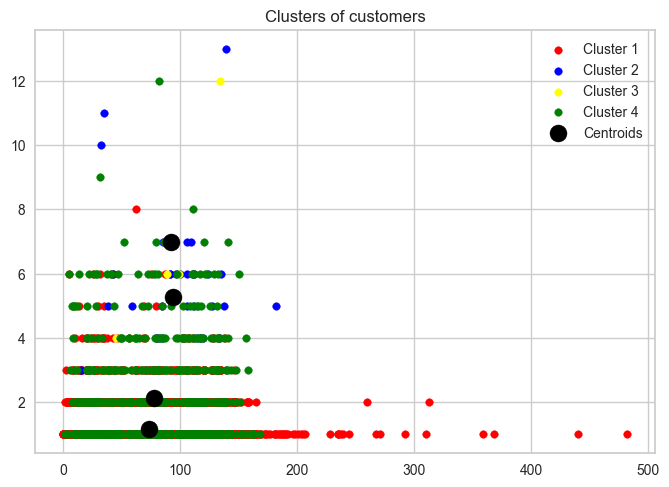

In [56]:
plt.scatter(unscaled_rfm_array[kmeans_clusters == 0, 0], unscaled_rfm_array[kmeans_clusters == 0, 1], s=30, c='red', label='Cluster 1')
plt.scatter(unscaled_rfm_array[kmeans_clusters == 1, 0], unscaled_rfm_array[kmeans_clusters == 1, 1], s=30, c='blue', label='Cluster 2')
plt.scatter(unscaled_rfm_array[kmeans_clusters == 2, 0],unscaled_rfm_array[kmeans_clusters == 2, 1], s=30, c='yellow', label='Cluster 3')
plt.scatter(unscaled_rfm_array[kmeans_clusters == 3, 0],unscaled_rfm_array[kmeans_clusters == 3, 1], s=30, c='green', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='black', label='Centroids')
plt.title('Clusters of customers')
plt.legend()
plt.show()

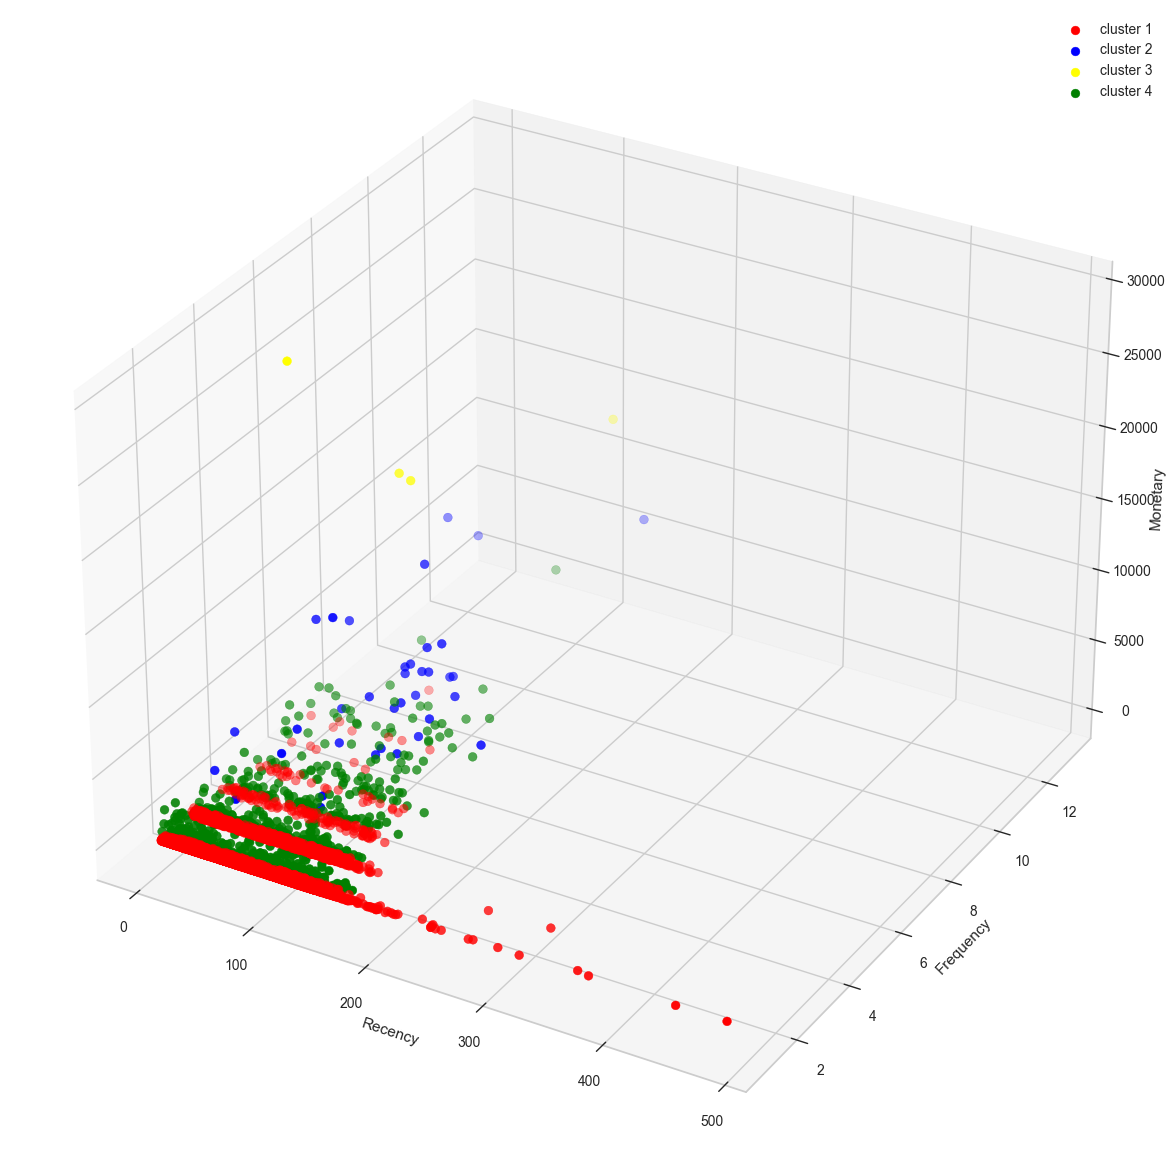

In [57]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(unscaled_rfm_array[kmeans_clusters == 0,0],unscaled_rfm_array[kmeans_clusters == 0,1],unscaled_rfm_array[kmeans_clusters == 0,2], s = 40 , color = 'red', label = "cluster 1")
ax.scatter(unscaled_rfm_array[kmeans_clusters == 1,0],unscaled_rfm_array[kmeans_clusters == 1,1],unscaled_rfm_array[kmeans_clusters == 1,2], s = 40 , color = 'blue', label = "cluster 2")
ax.scatter(unscaled_rfm_array[kmeans_clusters == 2,0],unscaled_rfm_array[kmeans_clusters == 2,1],unscaled_rfm_array[kmeans_clusters == 2,2], s = 40 , color = 'yellow', label = "cluster 3")
ax.scatter(unscaled_rfm_array[kmeans_clusters == 3,0],unscaled_rfm_array[kmeans_clusters == 3,1],unscaled_rfm_array[kmeans_clusters == 3,2], s = 40 , color = 'green', label = "cluster 4")
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.legend()
plt.show()

In [142]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d (x= rfm['Recency'],y= rfm['Frequency'],z= rfm['Monetary'],mode='markers',marker=dict(color = kmeans_clusters,size= 10,line=dict(color= kmeans_clusters,width= 12), opacity=0.8))
data = [trace1]
layout = go.Layout (title= 'Clusters using K-Means Clustering',scene = dict(xaxis = dict(title  = 'Recency'),yaxis = dict(title  = 'Frequency'),zaxis = dict(title  = 'Monetary')))
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

### Hierarchical Clustering

An alternative way to cluster customers is the hierarchical clustering. It works by creating clusters following a Dendrogram (which is a tree-like structure). That means, a subset of similar data is created in a tree-like structure in which the root node corresponds to the entire data, and branches are created from the root node to form several clusters. This will tell us what is the right number of clusters we need to tune.

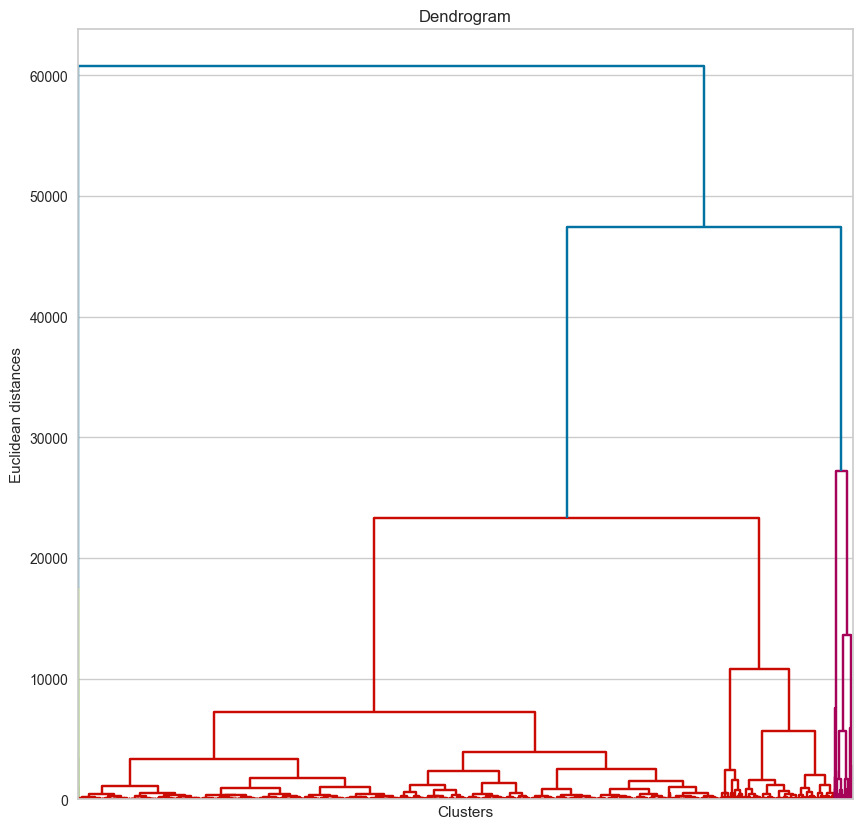

In [59]:
#HIERARCHICAL CLUSTERING 

#dendogram
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(10,10))
dendogram = sch.dendrogram (sch.linkage(rfm , method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distances')
plt.xticks([])
plt.show()

In [60]:
# AgglomerativeClustering Model initialization
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward' )

hc.fit(rfm)

AgglomerativeClustering(n_clusters=4)

In [61]:
# Predicting clusters
hc_clusters =hc.fit_predict(rfm)

rfmcopy= pd.DataFrame(rfm, columns=rfm.columns, index=rfm.index)
rfmcopy['cluster hc'] = hc_clusters

In [62]:
from sklearn import metrics
from sklearn.metrics.pairwise import euclidean_distances

sil_scores['hc'] = silhouette_score(rfm, hc_clusters , metric='euclidean')  #creating a dataframe for sil_scores

print(f"The silhouette score for hc is: {sil_scores['hc']}")

The silhouette score for hc is: 0.8716941998343148


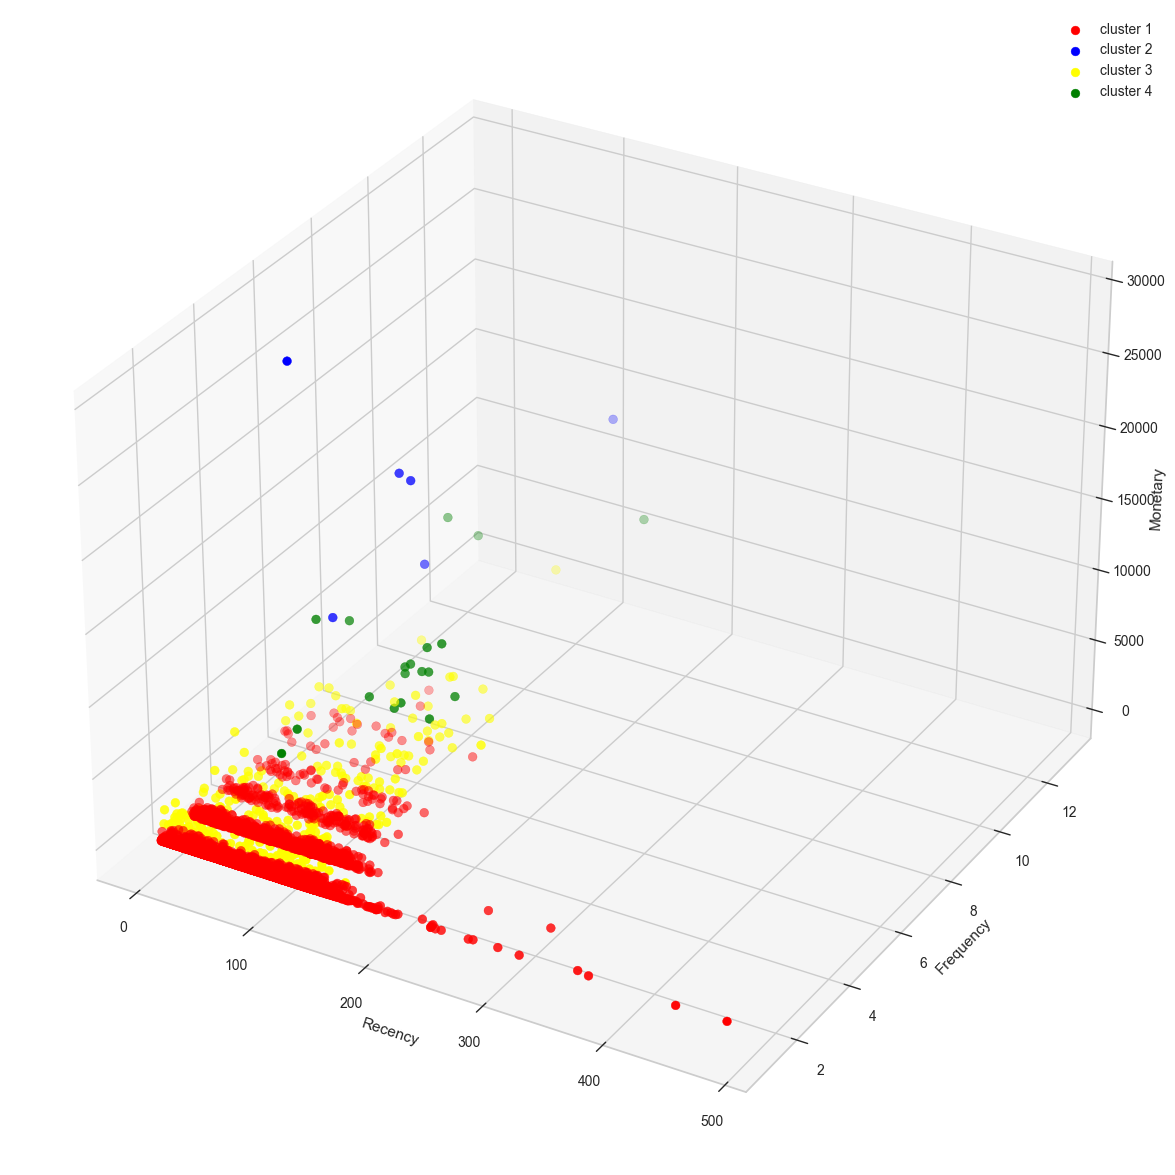

In [146]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(unscaled_rfm_array[hc_clusters == 0,0],unscaled_rfm_array[hc_clusters == 0,1],unscaled_rfm_array[hc_clusters == 0,2], s = 40 , color = 'red', label = "cluster 1")
ax.scatter(unscaled_rfm_array[hc_clusters == 1,0],unscaled_rfm_array[hc_clusters == 1,1],unscaled_rfm_array[hc_clusters == 1,2], s = 40 , color = 'blue', label = "cluster 2")
ax.scatter(unscaled_rfm_array[hc_clusters == 2,0],unscaled_rfm_array[hc_clusters == 2,1],unscaled_rfm_array[hc_clusters == 2,2], s = 40 , color = 'yellow', label = "cluster 3")
ax.scatter(unscaled_rfm_array[hc_clusters == 3,0],unscaled_rfm_array[hc_clusters == 3,1],unscaled_rfm_array[hc_clusters == 3,2], s = 40 , color = 'green', label = "cluster 4")
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.legend()
plt.show()

In [143]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d (x= rfm['Recency'],y= rfm['Frequency'],z= rfm['Monetary'],mode='markers',marker=dict(color = hc_clusters,size= 10,line=dict(color= hc_clusters,width= 12), opacity=0.8))
data = [trace1]
layout = go.Layout (title= 'Clusters using Hierarchical Clustering',scene = dict(xaxis = dict(title  = 'Recency'),yaxis = dict(title  = 'Frequency'),zaxis = dict(title  = 'Monetary')))
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

### Gaussian Mixture Model

While K-Means clustering can’t handle data clusters that either have mean values that are close together or are not circular, GMMs provide greater flexibility. With this type of clustering algorithm, it’s assumed that the data points are Gaussian distributed. Therefore, clusters can be of any elliptical shape and each Gaussian distribution becomes part of a single cluster. The optimization algorithm EM is used to find the parameters for each cluster (mean and standard deviation).

Advantages: GMMs are far more flexible than K-Means for cluster covariance. With the standard deviation parameter, clusters can be any ellipse shapes, rather than only circles. GMMs can also have multiple clusters (mixed membership) for a single data point since they use probabilities.

Disadvantages: GMM tends to be slower than K-Means since it requires more iterations to reach convergence

In [147]:
from sklearn.mixture import GaussianMixture
#case where we have overlap in our data,  K-Means doesn’t take into account the covariance of our data.

# Create empty list
S=[]

# Range of clusters to try (2 to 10)
K=range(2,11)

# Select data for clustering model
X = rfm

for k in K:
    # Set the model and its parameters
    gmm = GaussianMixture(n_components=k, n_init=20, init_params='random')
    # Fit the model 
    labels = gmm.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(X, labels, metric ='euclidean'))

We plot the silhouette score with a k range from 1 to 10 to see which one had the highest silhouette value

C:\Users\matte\AppData\Local\Temp\ipykernel_16100\4272326926.py:3: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.



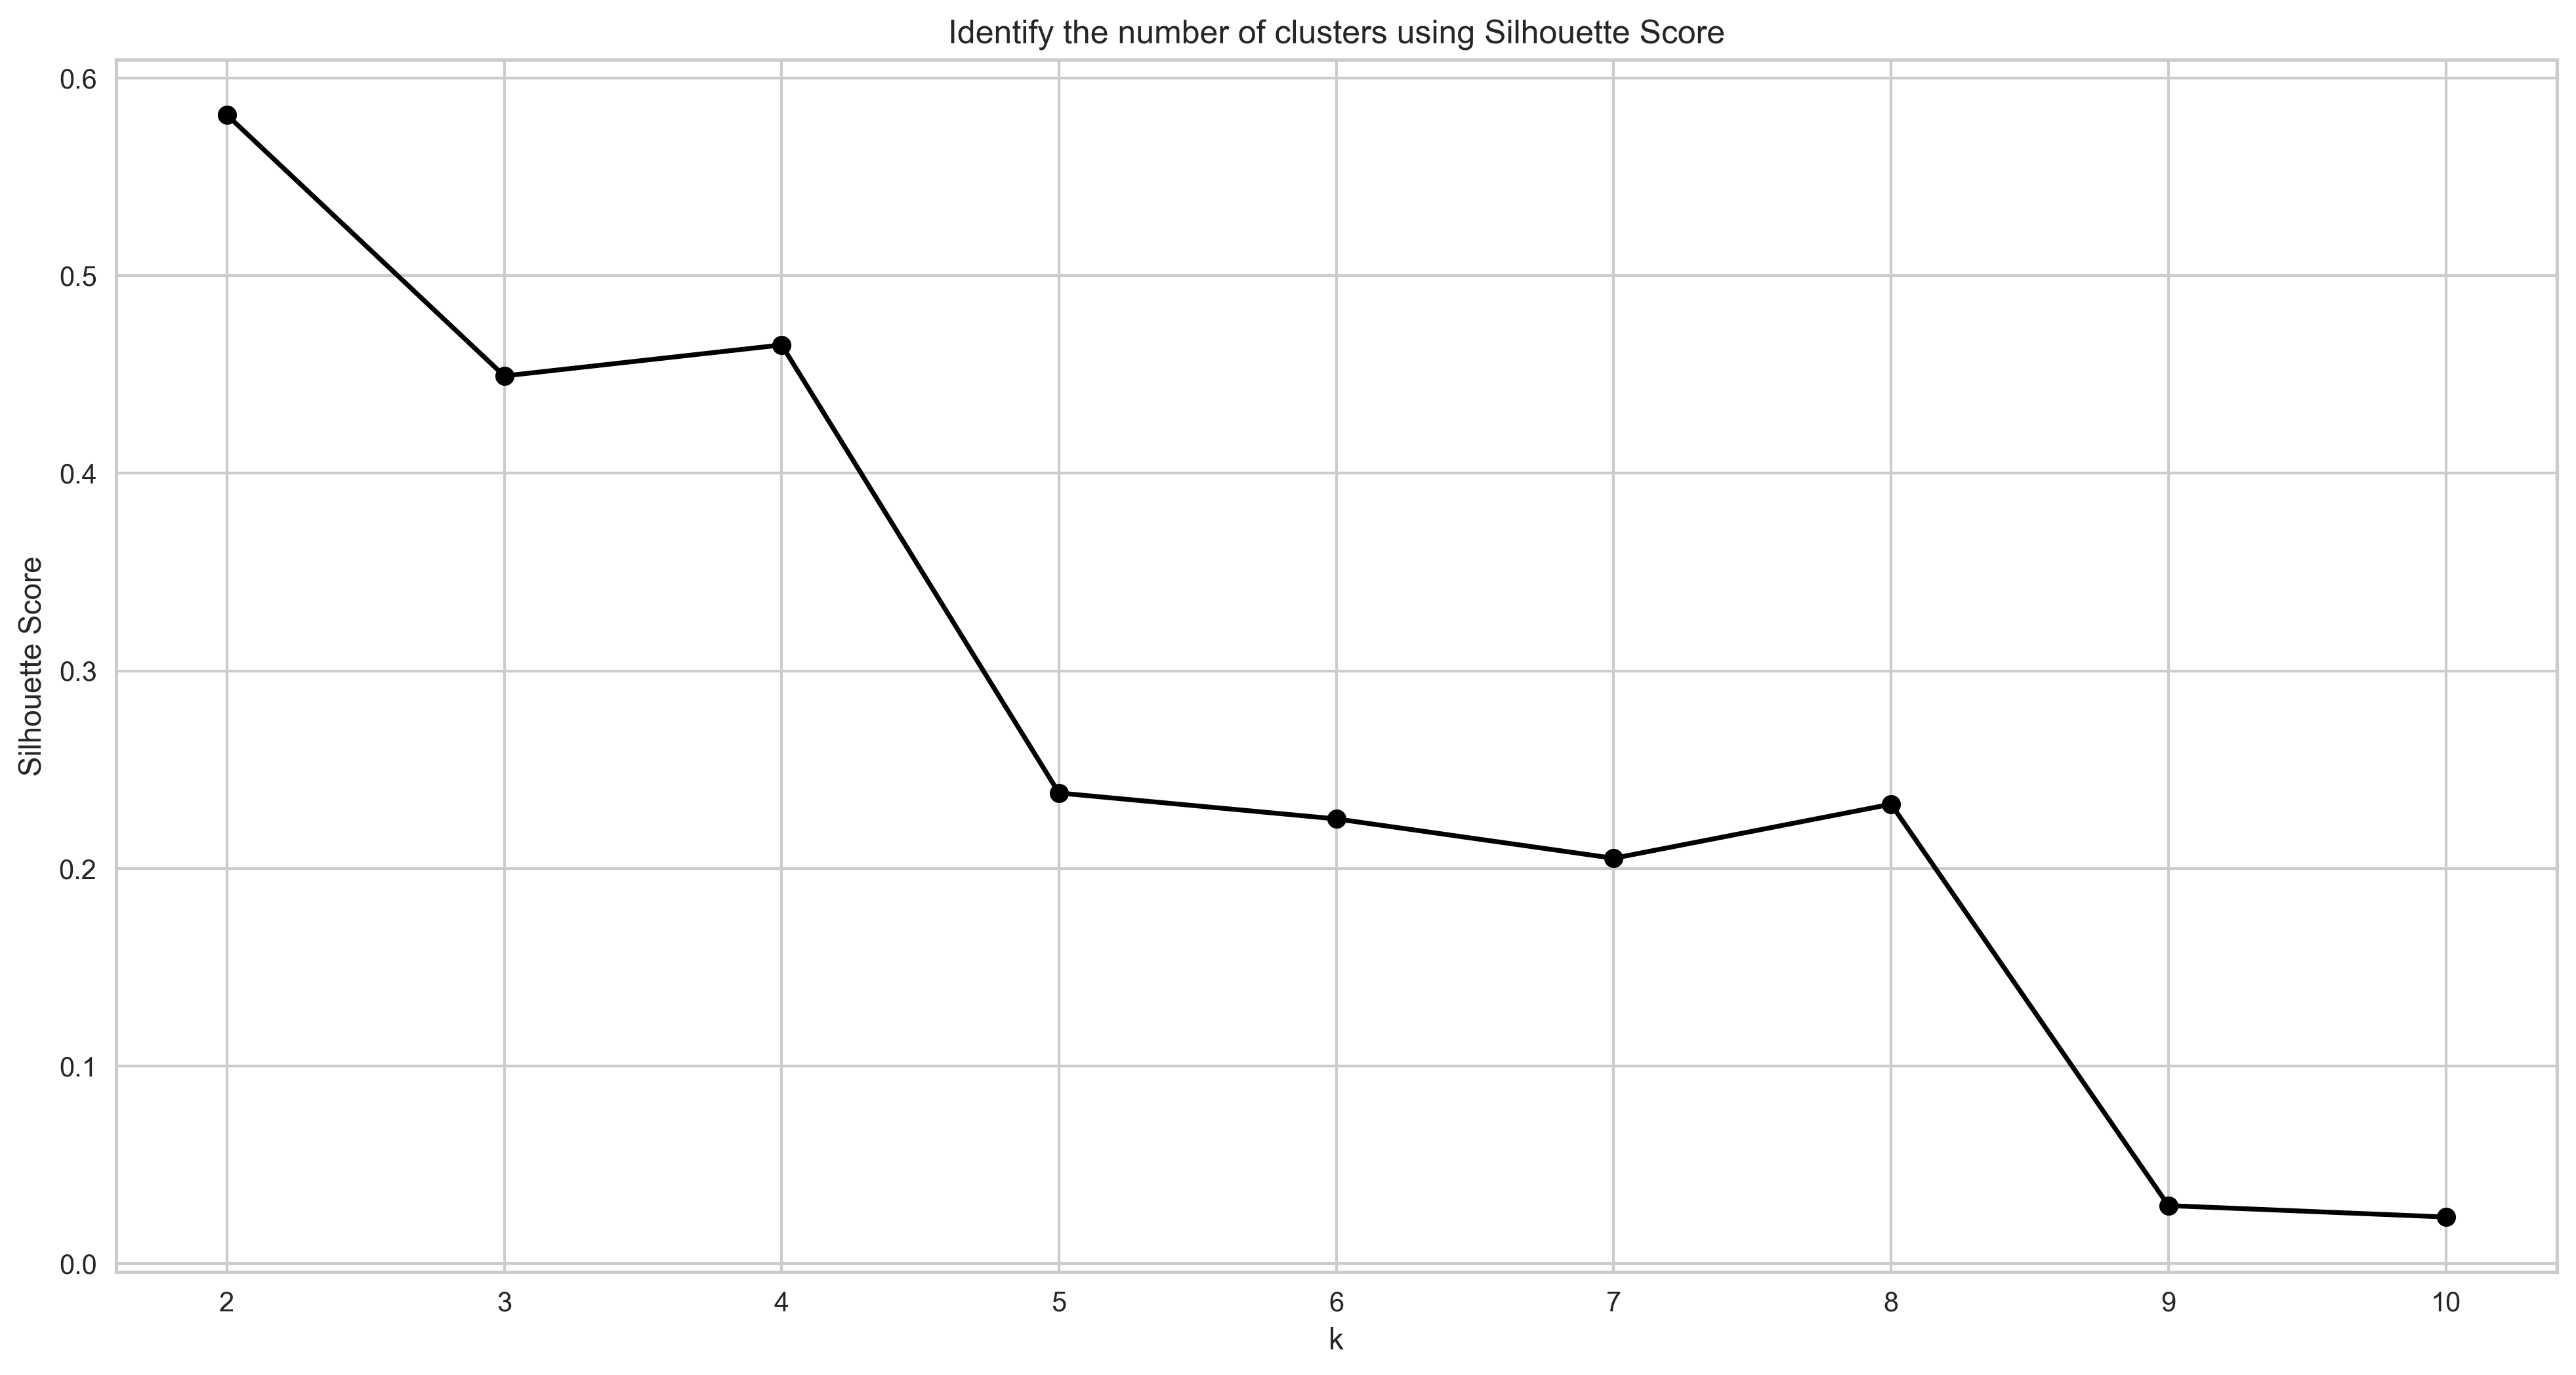

In [148]:
# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

We see 2, 3 and 4 have very high silhouette scores, hence we choose 4 clusters (the most reasonable choice).

If we were to use k-means to initialize the GMM we would get a silhouette score of 0.82, but since we used random, we will get a much lower score but much more interesting results (that we will explain later).

In [136]:
# Set the model and its parameters - 4 clusters
gmm = GaussianMixture(n_components=4, # this is the number of clusters
                         covariance_type='full', # {‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’
                         max_iter=300, # the number of EM iterations to perform. default=100
                         n_init=1, # the number of initializations to perform. default = 1
                         init_params='random', # the method used to initialize the weights, the means and the precisions. {'random' or default='k-means'}
                         verbose=0, # default 0, {0,1,2}
                         random_state=1 # for reproducibility
                        )

here, if we where to initialize with k-means, we would get (even if much higher) almost the same silhouette score and literally the same data as k-means. Hence we decided it was better to use the random method.

In [137]:
# Fit the model and predict labels
gmm.fit(X)
gmm_clusters = gmm.fit_predict(X)


rfmcopy =pd.DataFrame(rfm, columns=rfm.columns, index=rfm.index)
rfmcopy['cluster gmm']= gmm_clusters

sil_scores['gmm'] = silhouette_score(rfm, gmm_clusters , metric='euclidean')  #creating a dataframe for sil_scores

print(f"The silhouette score for gmm is: {sil_scores['gmm']}")

The silhouette score for gmm is: 0.4649525806819133


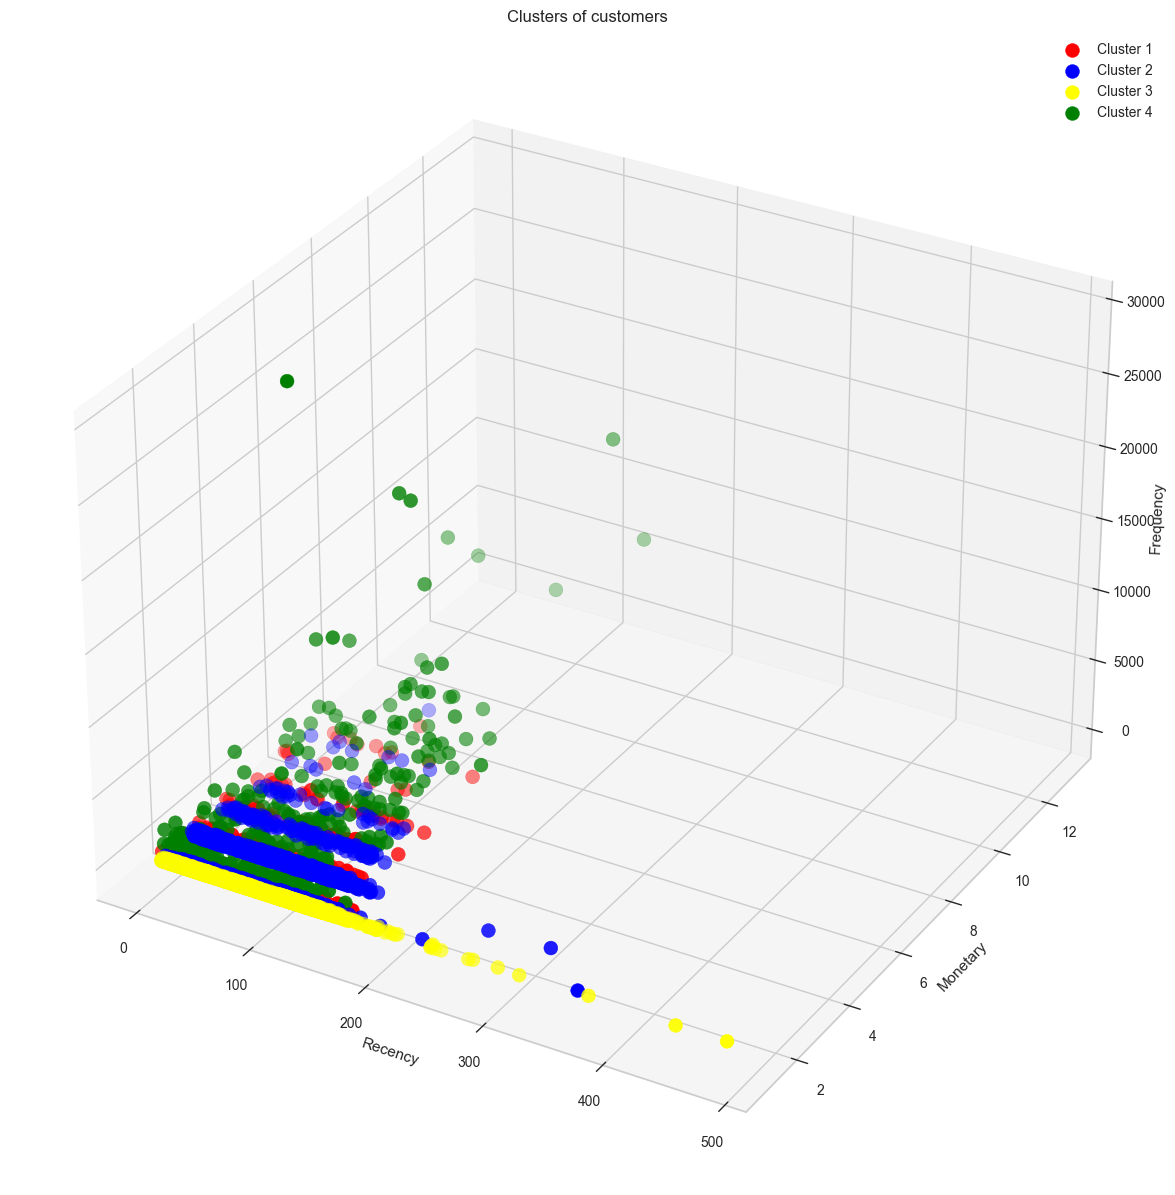

In [138]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(unscaled_rfm_array[gmm_clusters== 0, 0], unscaled_rfm_array[gmm_clusters == 0, 1], unscaled_rfm_array[gmm_clusters == 0,2], s = 100, c = 'red', label = 'Cluster 1')
ax.scatter(unscaled_rfm_array[gmm_clusters== 1, 0], unscaled_rfm_array[gmm_clusters == 1, 1], unscaled_rfm_array[gmm_clusters == 1,2], s = 100, c = 'blue', label = 'Cluster 2')
ax.scatter(unscaled_rfm_array[gmm_clusters== 2, 0], unscaled_rfm_array[gmm_clusters == 2, 1], unscaled_rfm_array[gmm_clusters == 2,2], s = 100, c = 'yellow', label = 'Cluster 3')
ax.scatter(unscaled_rfm_array[gmm_clusters== 3, 0], unscaled_rfm_array[gmm_clusters == 3, 1], unscaled_rfm_array[gmm_clusters == 3,2], s = 100, c = 'green', label = 'Cluster 4')

from mpl_toolkits.mplot3d import Axes3D
plt.title('Clusters of customers')
ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Frequency', rotation=45) 
plt.legend()
plt.show()

In [144]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d (x= rfm['Recency'],y= rfm['Frequency'],z= rfm['Monetary'],mode='markers',marker=dict(color = gmm_clusters,size= 10,line=dict(color= gmm_clusters,width= 12), opacity=0.8))
data = [trace1]
layout = go.Layout (title= 'Clusters using GMM Clustering',scene = dict(xaxis = dict(title  = 'Recency'),yaxis = dict(title  = 'Frequency'),zaxis = dict(title  = 'Monetary')))
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

### Spectral Clustering

Spectral Clustering, a graph clustering algorithm, is a method for clustering data that uses the eigenvalue decomposition of a matrix, which is a factorization theorem in matrix theory. The data clustering challenge is converted to graph form, graph clusters are identified, and then translated back. This lets you group nodes with a similar connection. The eigengap heuristic provides guidelines as to the number of clusters to choose.

Advantages: Clusters are not assumed to be of a particular shape or distribution. It can perform equally well with a variety of data shapes. It does not require the actual data set, but just the similarity and distance matrix or the Laplacian. Therefore, it can cluster one-dimensional data.

Disadvantages: You must choose the number of clusters, but heuristic can be used. It may be expensive to compute using this method, but frameworks and algorithms are available

In [80]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=4, random_state=42, n_neighbors=8, affinity='nearest_neighbors')
spectral.fit(rfm)
sp_clusters= spectral.fit_predict(rfm)


rfmcopy =pd.DataFrame(rfm, columns=rfm.columns, index=rfm.index)
rfmcopy['cluster sp']= sp_clusters

sil_scores['sp'] = silhouette_score(rfm, sp_clusters , metric='euclidean')  #creating a dataframe for sil_scores

print(f"The silhouette score for sp is: {sil_scores['sp']}")

The silhouette score for sp is: 0.310082165371231


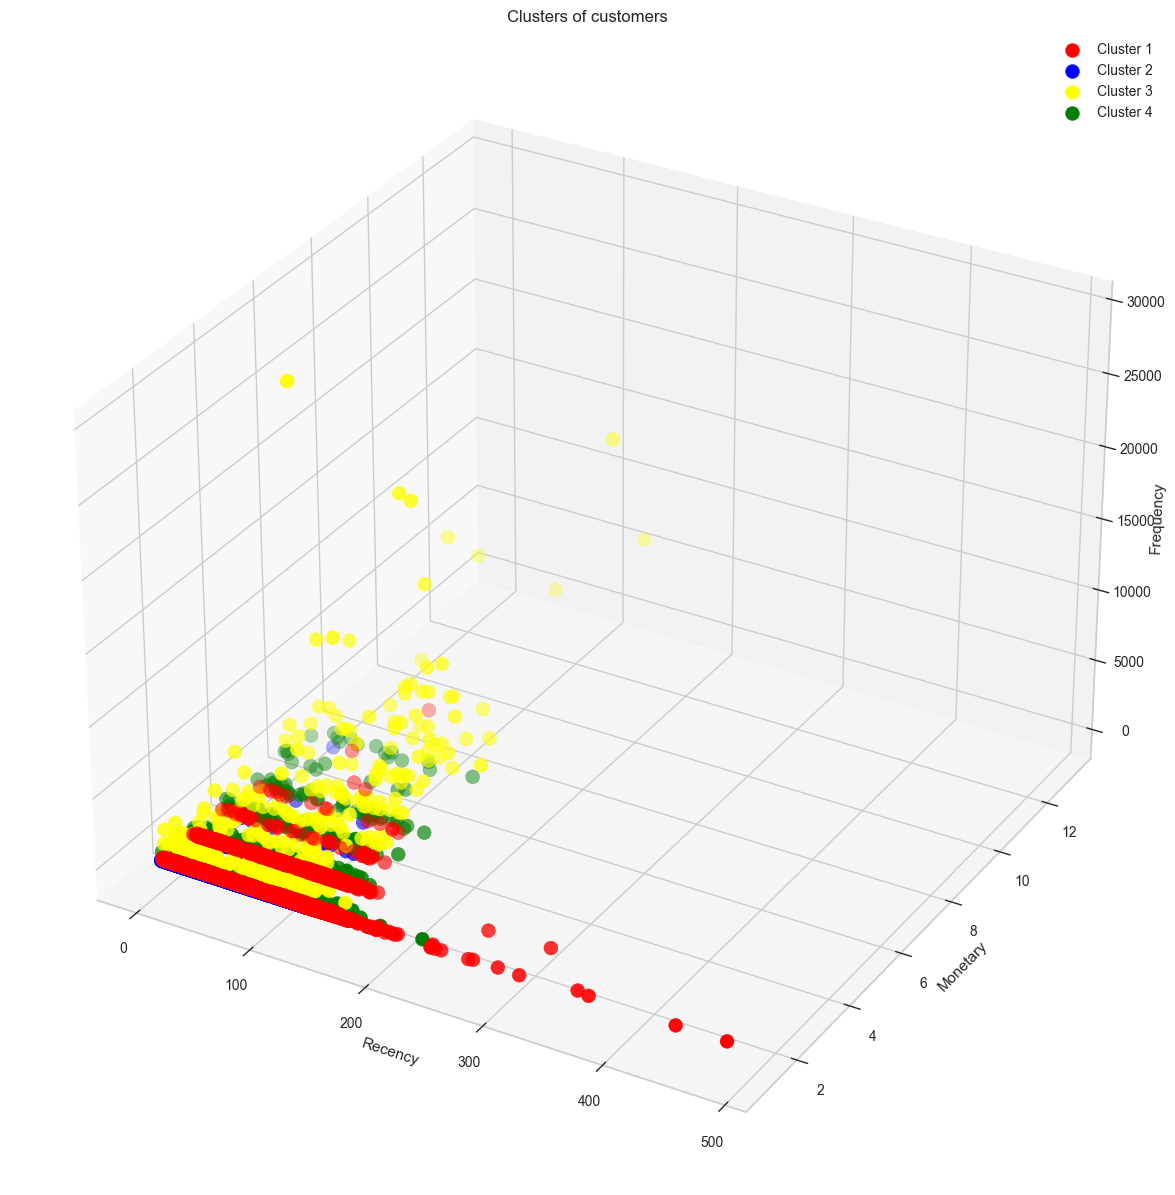

In [87]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(unscaled_rfm_array[sp_clusters== 0, 0], unscaled_rfm_array[sp_clusters == 0, 1], unscaled_rfm_array[sp_clusters == 0,2], s = 100, c = 'red', label = 'Cluster 1')
ax.scatter(unscaled_rfm_array[sp_clusters== 1, 0], unscaled_rfm_array[sp_clusters == 1, 1], unscaled_rfm_array[sp_clusters == 1,2], s = 100, c = 'blue', label = 'Cluster 2')
ax.scatter(unscaled_rfm_array[sp_clusters== 2, 0], unscaled_rfm_array[sp_clusters == 2, 1], unscaled_rfm_array[sp_clusters == 2,2], s = 100, c = 'yellow', label = 'Cluster 3')
ax.scatter(unscaled_rfm_array[sp_clusters== 3, 0], unscaled_rfm_array[sp_clusters == 3, 1], unscaled_rfm_array[sp_clusters == 3,2], s = 100, c = 'green', label = 'Cluster 4')

from mpl_toolkits.mplot3d import Axes3D
plt.title('Clusters of customers')
ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Frequency', rotation=45) 
plt.legend()
plt.show()

In [145]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d (x= rfm['Recency'],y= rfm['Frequency'],z= rfm['Monetary'],mode='markers',marker=dict(color = sp_clusters,size= 10,line=dict(color= sp_clusters,width= 12), opacity=0.8))
data = [trace1]
layout = go.Layout (title= 'Clusters using Spectral Clustering',scene = dict(xaxis = dict(title  = 'Recency'),yaxis = dict(title  = 'Frequency'),zaxis = dict(title  = 'Monetary')))
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

### Final Considerations:

We can say without a doubt that HC, K-Means both outperformed Spectral and GMM by a long shot when it comes to clustering visualization and detection, and also as far as silhouette score goes. In order to create the clusters they mostly looked at monetary and frequency values, whereas it seems spectral and GMM kind of failed to identify a group of really high spenders and one of mid spenders.

In [149]:
#dataframe with silhouette score
scores = pd.DataFrame (sil_scores, index=[0])
scores.head()

k-means        hc       gmm        sp
0  0.821611  0.871694  0.464953  0.310082

In [130]:
rfmcopy.head()

Recency  Frequency  Monetary  cluster k-means  cluster hc  cluster gmm  \
0      111          1    141.90                0           0            0   
1        8          1     27.75                0           0            0   
2       32          1    122.07                0           0            0   
3        5          2    329.62                0           0            0   
4      120          1    197.27                0           0            0   

   cluster sp  
0           0  
1           1  
2           0  
3           0  
4           0

In [108]:
rfm.groupby('cluster k-means').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(1)


Recency Frequency Monetary       
                   mean      mean     mean  count
cluster k-means                                  
0                  72.9       1.1    150.9  10540
1                  93.9       5.3   5821.2     36
2                  91.8       7.0  20673.6      4
3                  77.1       2.1   1192.5    667

As far as k-means goes, we identify in cluster 0 all the 'at risk customers', which are those customers that only really bought once and spent a small amount of money (the great majority of users), we then have our loyal customers in clusters 1 and 2, those are the ones who buy and spend a lot, and the cluster 3 is our mid-spenders who bought more than once.

In [124]:
k=rfm.groupby('cluster hc').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(1)
k.head()

Recency Frequency Monetary       
              mean      mean     mean  count
cluster hc                                  
0             73.1       1.2    179.9  10980
1             88.5       6.5  17775.7      6
2             78.6       2.6   1948.6    242
3             91.8       6.2   6535.1     19

In HC we have a very similar situation where the customers at risk are the cluster 0, the  mid-spenders are the ones belonging to cluster 2, and clusters 1 and 3 are the big spenders.

In [140]:
rfm.groupby('cluster gmm').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(1)

Recency Frequency Monetary      
               mean      mean     mean count
cluster gmm                                 
0              76.9       1.9    875.7   440
1              74.5       1.9    332.3  1768
2              72.6       1.0    114.3  8772
3              79.7       3.0   2630.6   267

In [111]:
rfm.groupby('cluster sp').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(1)

Recency Frequency Monetary      
              mean      mean     mean count
cluster sp                                 
0             85.1       1.1    161.1  5855
1             54.2       1.0     59.0  3804
2             77.7       2.9   2564.7   280
3             74.6       1.7    605.6  1308

As far as GMM and SP go, we have a very balanced distribution of cluster sizes, but the algorithm was still able to identify and segment the customers in high, mid and low spenders. in case of GMM we have cluster2 being the 'at risk' customers, 0 and 1 being the average consumer, and 3 being the loyal ones.

In SP we have cluster 0 and 1 being the low spenders (very easily lost customers if the company doesn't intervene in some way), cluster 3 are the mid spenders and cluster 2 contains the loyal customers and the big spenders.

All of the algorithms were able to segment the customers in 3 main categories, with k-means and HC favoring a lot outliers and GMM and SP taking a more 'balanced' approach.

The next step for the company is to intervene and try to retain all possible 'at risk' customers, using marketing or other strategies.

One can also visualize the results of the different clusters using displots, to see how the customer population is distributed based on the 3 features we have.

We used k-means both for himself and HC since very similar, and SP and GMM.

c:\Users\matte\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:254: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

c:\Users\matte\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:254: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

c:\Users\matte\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:254: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the 

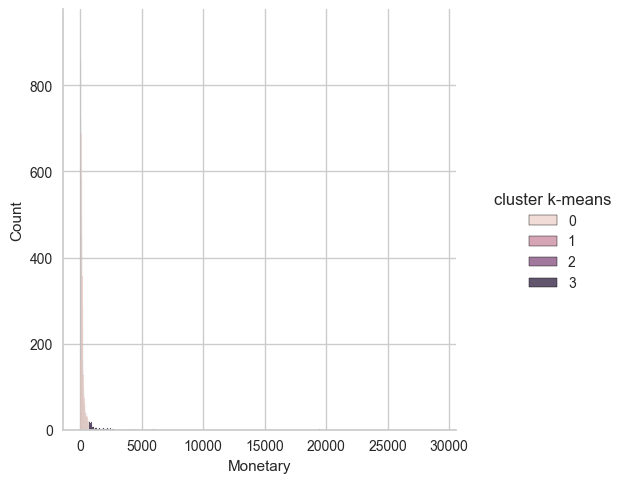

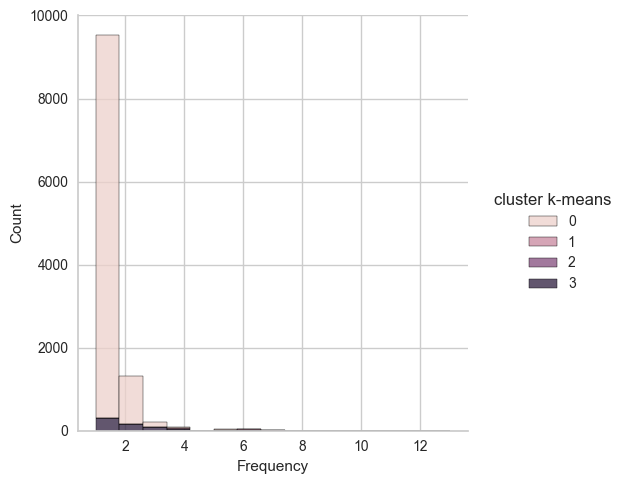

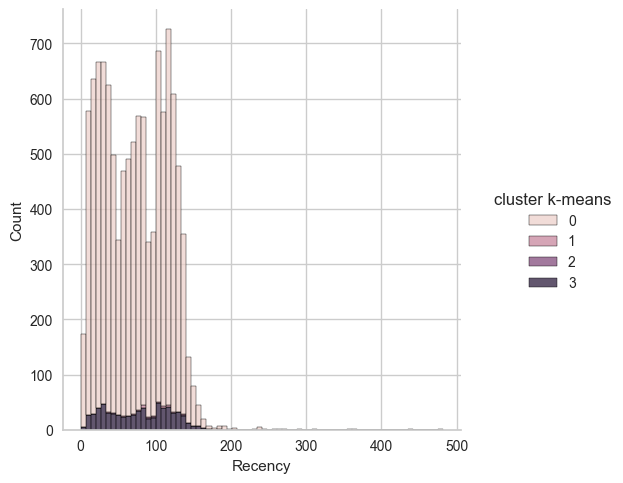

In [133]:

scaledrfm = rfmcopy.copy()

sns.set_palette("Dark2")
sns.displot(data = scaledrfm , x = 'Monetary', hue = "cluster k-means", multiple = "stack")
sns.displot(data = scaledrfm , x = "Frequency" , hue = "cluster k-means", multiple = "stack")
sns.displot(data = scaledrfm , x = "Recency" , hue = "cluster k-means", multiple = "stack")

c:\Users\matte\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:254: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

c:\Users\matte\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:254: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

c:\Users\matte\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:254: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the 

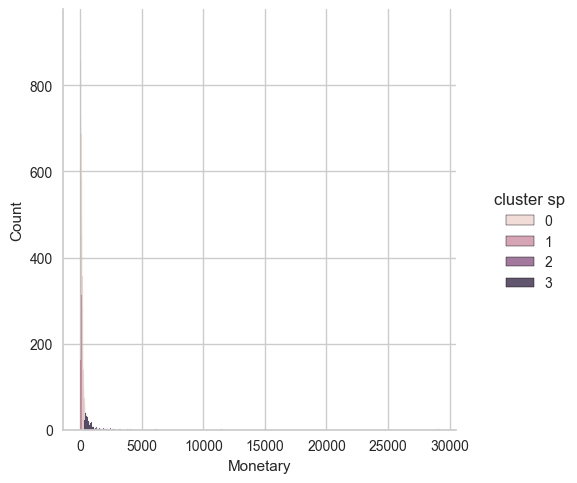

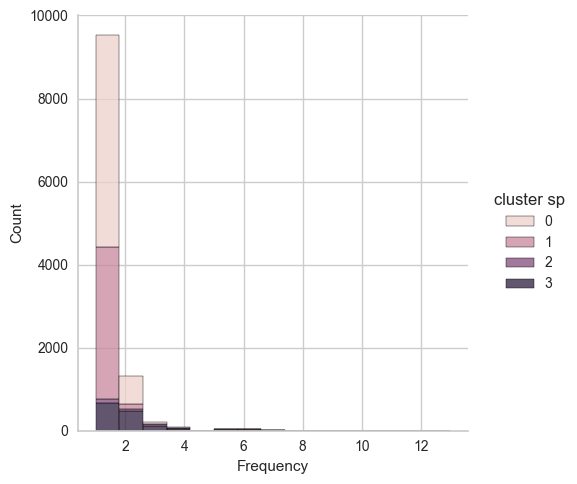

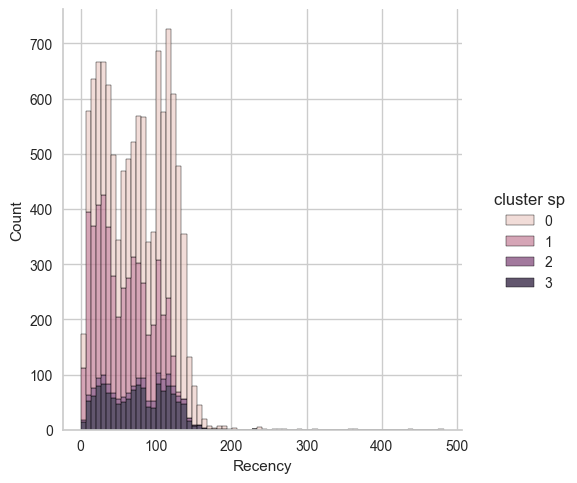

In [135]:
sns.set_palette("Dark2")
sns.displot(data = scaledrfm , x = 'Monetary', hue = "cluster sp", multiple = "stack")
sns.displot(data = scaledrfm , x = "Frequency" , hue = "cluster sp", multiple = "stack")
sns.displot(data = scaledrfm , x = "Recency" , hue = "cluster sp", multiple = "stack")

c:\Users\matte\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:254: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

c:\Users\matte\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:254: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

c:\Users\matte\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:254: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the 

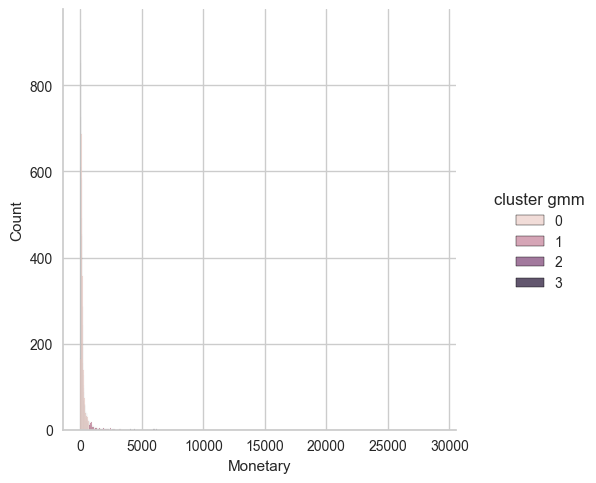

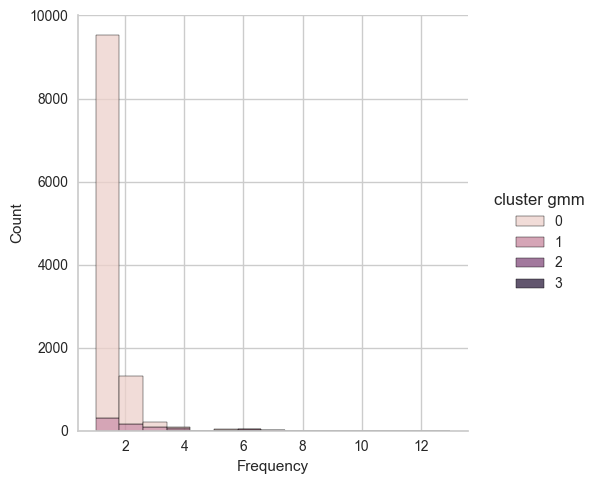

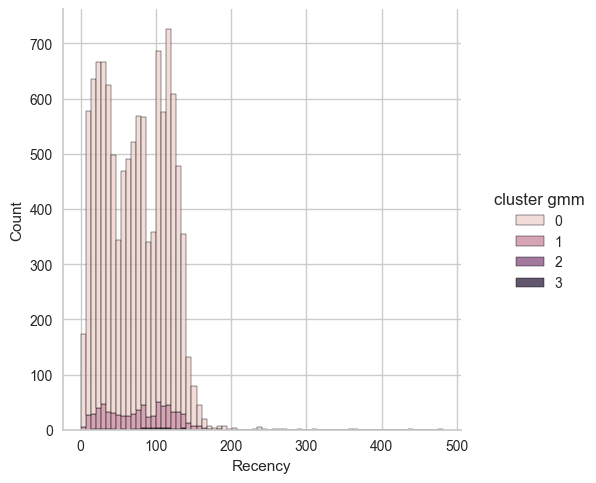

In [141]:
sns.set_palette("Dark2")
sns.displot(data = scaledrfm , x = 'Monetary', hue = "cluster gmm", multiple = "stack")
sns.displot(data = scaledrfm , x = "Frequency" , hue = "cluster gmm", multiple = "stack")
sns.displot(data = scaledrfm , x = "Recency" , hue = "cluster gmm", multiple = "stack")

To conclude, we can say that the customers of this subsidiary are segmented in 3 categories: low/at risk spenders (people who purchases rarely, or even only once); average customers (the usual customer with average spendings) and the high spenders customers (those who buy frequently and many more times than the average).

The subsidiary should focus on trying to retain the at risk customers, by using strategies such as promotions and sales.

It should also focus on keeping their loyal / mid spenders.

It should definitely itroduce new, lesser known products and try to increase the sales of products that are not being sold so much.

For high / top spenders the firm should really just keep promoting whatever they are already buying.